# 🧬 AMES Mutagenicity Prediction

## 📖 Dataset Description
Mutagenicity refers to the ability of a drug to induce genetic alterations. Drugs that damage DNA may lead to cell death or other severe adverse effects.

The **AMES test**, developed by Professor Bruce Ames, is a widely used biological assay to assess mutagenicity. It is a short-term bacterial reverse mutation assay that detects many compounds that can cause genetic damage or frameshift mutations.

The **AMES dataset** used here is aggregated from four scientific studies.

- **Task Type**: Binary classification  
- **Input**: SMILES string of a drug molecule  
- **Output**: `1` (mutagenic) or `0` (not mutagenic)  
- **Size**: 7,255 compounds

## 📚 References
Xu, Congying, et al. “In silico prediction of chemical Ames mutagenicity.” Journal of chemical information and modeling 52.11 (2012): 2840-2847.

**License**: CC BY 4.0

## 📦 Imports

This section contains all the necessary Python libraries and modules required for the notebook to run. It includes standard libraries, third-party packages, and project-specific modules used for data processing, visualization, modeling, and evaluations.

**⚠️ Please ensure the `imports` and the `Declare category and dataset` cell are always executed after restarting the notebook as all sections of the notebook use variables and packages from these two cells.**

In [1]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import pandas as pd
from scripts.tdc_dataset_download import TDCDatasetDownloader
from scripts.eda_utils import DatasetLoader, EDAVisualizer, SMARTSPatternAnalyzer
from scripts.featurise import MolecularFeaturiser
from scripts.model_utils import ModelPreprocessor, ModelTrainer, ModelInference

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


______

## 📥 Download AMES Dataset

Here, the dataset name and category variable are declared.

**⚠️ Please ensure the `imports` above and the `Declare category and dataset` cell are always executed after restarting the notebook as all sections of the notebook use variables and packages from these two cells.**

In [2]:
######################################## Declare category and dataset ######################################## 

category = 'tox'
dataset = 'AMES'

In [ ]:
######################################## Initiate downloader class to download the dataset ######################################## 

downloader = TDCDatasetDownloader(category, dataset)

________

## 📊 Exploratory Data Analysis

In this section, we analyze the AMES mutagenicity dataset to better understand its structure, balance, and molecular content. Exploratory Data Analysis (EDA) helps us uncover patterns, detect anomalies, and gain insights that will guide our preprocessing and modeling steps.

### 1. Load Datasets ###

In [3]:
######################################## Initialize the dataset loader ######################################## 
loader = DatasetLoader(dataset_name=dataset)

In [4]:
######################################## Load datasets ######################################## 
main_df, train_df, valid_df, test_df = loader.load_all()

🧬 AMES_main  ➡️ (7278, 3)
⚗️ AMES_train ➡️ (5094, 3)
🔬 AMES_valid ➡️ (728, 3)
🧪 AMES_test  ➡️ (1456, 3)


______

### 2. 📦 Dataset Overview ###

Before diving into the analysis, it’s essential to understand the structure of the datasets we’re working with — including the main dataset and the train/validation/test splits.

The function `EDAVisualizer.show_dataset_info()` provides a concise summary of:
- Shape (rows × columns)
- Column names
- Missing values
- Sample preview (via `.head()`)

You can run this by:
```python
EDAVisualizer.show_dataset_info(loader)

```
Alternatively, for specific splits only e.g for just Train and Test Data:
```python
selected_datasets = ['train','test']
EDAVisualizer.show_dataset_info(loader, dataset_names=selected_datasets)



In [5]:
######################################## Show Dataset Info  ########################################

EDAVisualizer.show_dataset_info(loader)

🧬 AMES_main Info
----------------------------------------
Shape: (7278, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


Drug_ID                                               Drug  Y
0  Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1
1  Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1
2  Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0
3  Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1
4  Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1



⚗️ AMES_train Info
----------------------------------------
Shape: (5094, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


Drug_ID                                               Drug  Y
0  Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1
1  Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0
2  Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1
3  Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1
4  Drug 6          CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O  1



🔬 AMES_valid Info
----------------------------------------
Shape: (728, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


Drug_ID                                               Drug  Y
0  Drug 4852  C=C(C)C(=O)OCC(O)COc1ccc(C(C)(C)c2ccc(OCC(O)CO...  0
1  Drug 4411                    Cc1c2cc(CO)ccc2nc2c1ccc1ccccc12  1
2  Drug 2192                                   CC(=O)NNc1ccccc1  1
3  Drug 5800                                          CN(C)CCCN  0
4  Drug 3586                           Cc1cc([N+](=O)[O-])ccc1N  1



🧪 AMES_test Info
----------------------------------------
Shape: (1456, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


Drug_ID                                  Drug  Y
0  Drug 6060  Cc1cc(=O)oc2ccc3c(c12)C1(C)OOC1(C)O3  1
1  Drug 6703                        CN(CC(O)CO)N=O  1
2  Drug 6827          O=[N+]([O-])c1ccc(OC2CO2)cc1  1
3  Drug 3689          Cn1cnc2cc([N+](=O)[O-])ccc21  0
4  Drug 4516            CC[C@H](CO)NCCN[C@H](CC)CO  0

-----

### 3. 💎 Unique SMILES Analysis ###

Knowing how many unique compounds exist in each dataset helps:
- Measure diversity
- Avoid duplication bias
- Confirm splits are stratified

Run:
```python
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)


In [8]:
######################################## Check Unique  Drug  Count in each dataset  ########################################
print(f"Number of Unique drug count in {dataset} train data is: =====>> {train_df['Drug'].nunique()}\n")
print(f"Number of Unique drug count in {dataset} validation data is: =====>> {valid_df['Drug'].nunique()}\n")
print(f"Number of Unique drug count in {dataset} test data is: =====>> {test_df['Drug'].nunique()}\n")
print(f"Total number of Unique drug count in {dataset} data is: =====>> {main_df['Drug'].nunique()}\n")

Number of Unique drug count in AMES train data is: =====>> 5084

Number of Unique drug count in AMES validation data is: =====>> 726

Number of Unique drug count in AMES test data is: =====>> 1454

Total number of Unique drug count in AMES data is: =====>> 7255



Unique SMILES counts per dataset:
Train: 5084
Valid: 726
Test: 1454


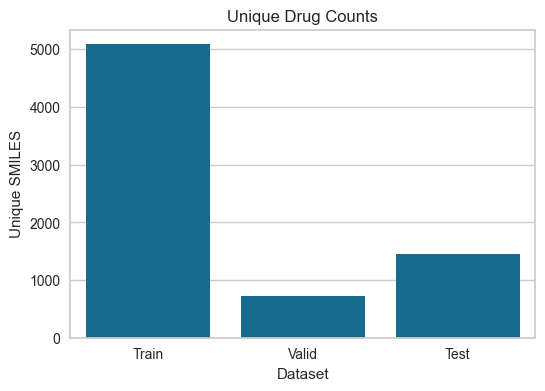

In [9]:
######################################## Compare Unique  Drug  Count Distribution  ########################################
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)

_____

### 4. 🧮  Target Class Distribution in dataset ###

Class imbalance is a common challenge in classification tasks. Plotting the distribution of the target labels helps us understand:
- Whether the dataset is balanced
- The dominant class (if any)
- The need for resampling or weighted loss functions

We use:
```python
EDAVisualizer.plot_label_distribution(df)


🧮 Class Counts:
1    3974
0    3304
Name: Y, dtype: int64

📊 Class Percentages:
1    54.6
0    45.4
Name: Y, dtype: float64


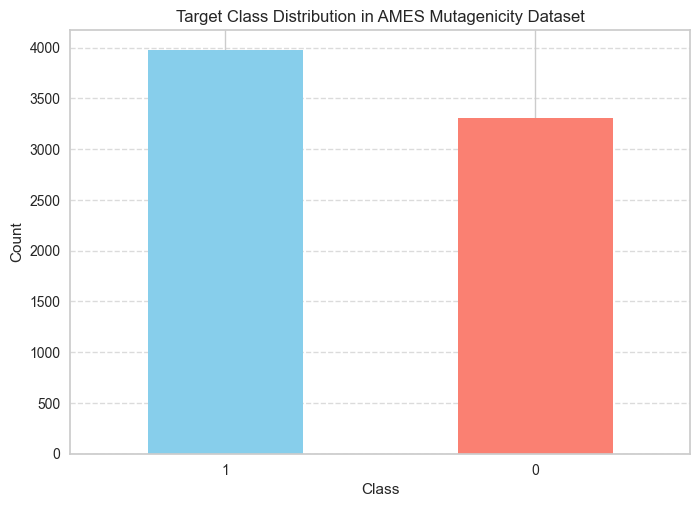

In [12]:
########################################  Plot class distribution on Main Dataset ######################################## 
EDAVisualizer.plot_label_distribution(main_df, target_col='Y', title='Target Class Distribution in AMES Mutagenicity Dataset')

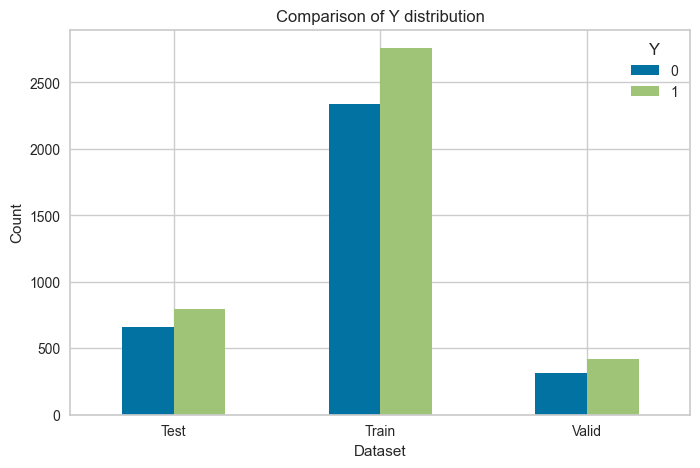


Label distribution percentages:
Y            0      1
Dataset              
Test     45.19  54.81
Train    45.84  54.16
Valid    42.72  57.28


In [11]:
########################################  Plot class distribution Comparison between Split Dataset ######################################## 
EDAVisualizer.compare_label_distributions(
    dfs=[train_df, valid_df, test_df], 
    df_names=['Train', 'Valid', 'Test'], 
    target_col='Y'
)

______

### 5. 📏 SMILES (Simplified Molecular Input Line Entry System) Length Analysis ###

SMILES strings vary in length depending on the molecular complexity. Analyzing their length:
- Highlights outliers or unusually long/short molecules
- Informs sequence-based model designs (like RNNs, Transformers)

To analyze the distribution:
```python
EDAVisualizer.check_smiles_length(loader=loader)


📏 SMILES Length Stats for Main:


count    7278.000000
mean       30.433773
std        15.943264
min         3.000000
25%        19.000000
50%        28.000000
75%        38.000000
max       175.000000
Name: smiles_length, dtype: float64

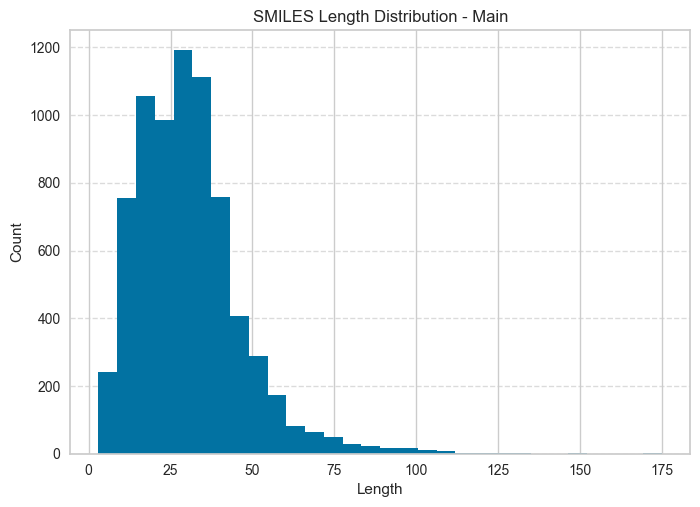

In [15]:
########################################  Check the SMILES Length Distribution of the Full Dataset ######################################## 
EDAVisualizer.check_smiles_length(loader=loader, names=["AMES Dataset"])

📏 SMILES Length Stats for Train:


count    5094.000000
mean       30.504319
std        16.201978
min         3.000000
25%        19.000000
50%        28.000000
75%        38.000000
max       175.000000
Name: smiles_length, dtype: float64

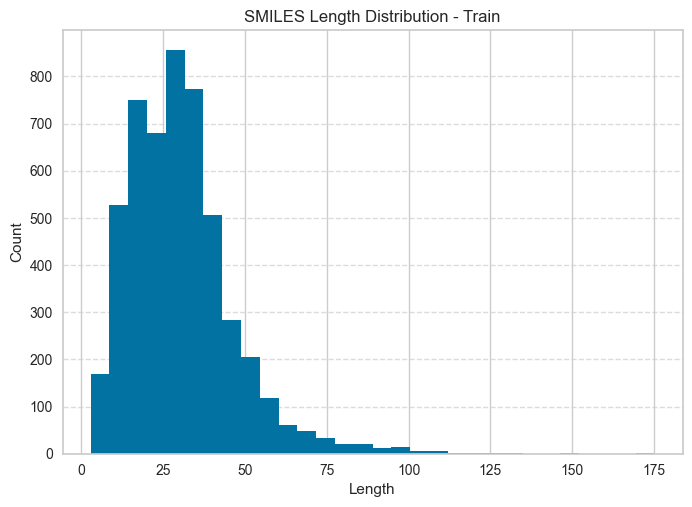

📏 SMILES Length Stats for Test:


count    1456.000000
mean       30.170330
std        15.305318
min         3.000000
25%        19.000000
50%        29.000000
75%        38.000000
max       107.000000
Name: smiles_length, dtype: float64

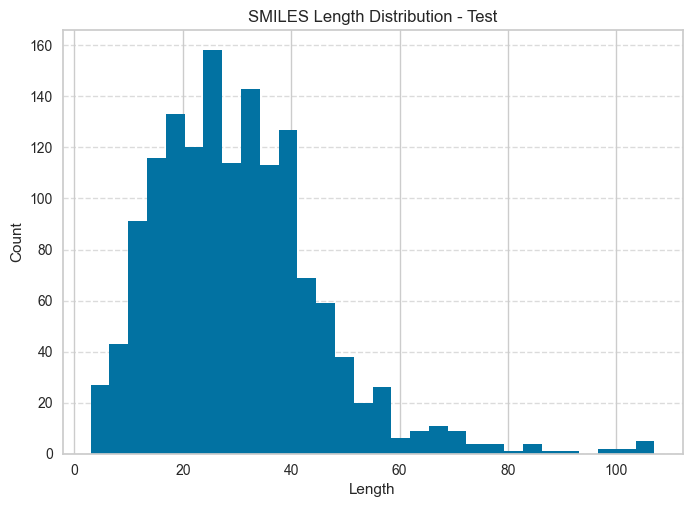

📏 SMILES Length Stats for Validation:


count    728.000000
mean      30.467033
std       15.373623
min        4.000000
25%       19.000000
50%       29.000000
75%       38.000000
max      102.000000
Name: smiles_length, dtype: float64

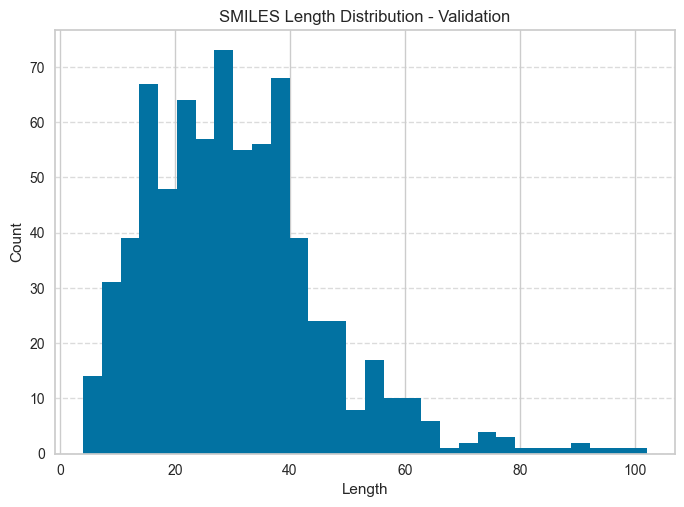

In [14]:
########################################  Alternatively, Check the SMILES Length Distribution of the Selected/Multiple Dataset Splits ######################################## 
EDAVisualizer.check_smiles_length(dfs=[train_df, test_df, valid_df], names=["Train","Test","Validation" ])


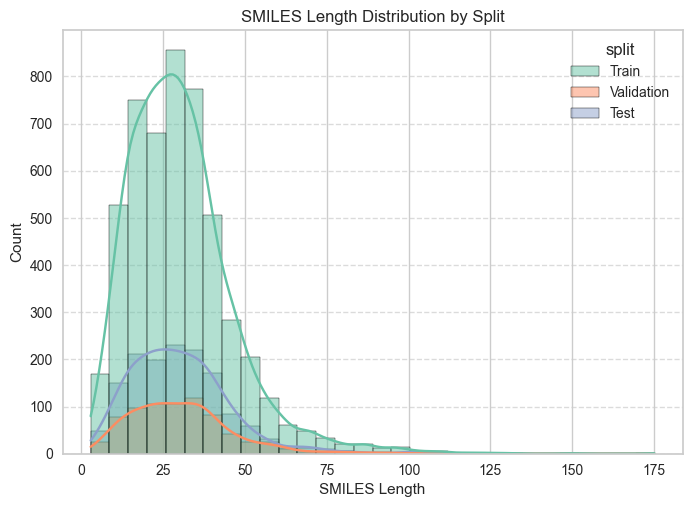

In [16]:
########################################  Compare the SMILES Length Distribution between Split Dataset ######################################## 

EDAVisualizer.compare_smiles_length(loader=loader)

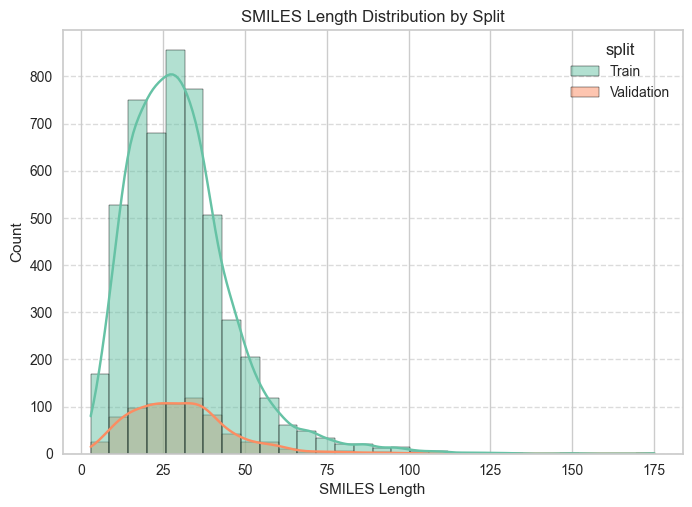

In [17]:
######################################## Alternatively, we can compare selected splits dataset by executing below ######################################## 

selected_dfs = [train_df, valid_df]
dataset_names=['Train', 'Validation']


EDAVisualizer.compare_smiles_length(selected_dfs, dataset_names)

_____________

### 5. ✔️ RDKit Molecular Validity Check ###

Not all SMILES strings are guaranteed to represent valid molecules. Some may contain syntax errors or rare patterns RDKit cannot parse.

This function evaluates validity by attempting to convert each SMILES to an RDKit Mol object:
```python
EDAVisualizer.check_molecular_validity(loader=loader)


You can also pass a different column name if your SMILES column isn’t named Drug e.g:

EDAVisualizer.check_molecular_validity(train_df, smiles_col='SMILES')

In [18]:
######################################## Check Drug Molecular Validity ######################################## 

EDAVisualizer.check_molecular_validity(loader=loader)

🧪 Validity for Main:
True    7278
Name: is_valid_mol, dtype: int64
❗ Invalid molecules in Main: 0.00%

🧪 Validity for Train:
True    5094
Name: is_valid_mol, dtype: int64
❗ Invalid molecules in Train: 0.00%

🧪 Validity for Validation:
True    728
Name: is_valid_mol, dtype: int64
❗ Invalid molecules in Validation: 0.00%

🧪 Validity for Test:
True    1456
Name: is_valid_mol, dtype: int64
❗ Invalid molecules in Test: 0.00%



____________

### 6. 🧬 Molecular Descriptor Engineering ###
Use RDKit to calculate standard drug-likeness properties for molecules — a key step in both Exploratory Data Analysis (EDA) and featurization.

This function computes key cheminformatics descriptors from SMILES using RDKit:
- Molecular weight (MW)
- LogP (lipophilicity)
- Topological Polar Surface Area (TPSA)
- Hydrogen Bond Donors/Acceptors (HBD/HBA)
- Rotatable bonds
- Ring counts (total and aromatic)

These descriptors provide chemical insights into your dataset during EDA (e.g., distribution of molecular weights) and also serve as informative features for downstream machine learning models.

You can add descriptors to a dataset via:
```python
EDAVisualizer.add_molecular_descriptors(loader=loader)

```
You can also:

🔹 Apply to Specific DataFrames:

```python
EDAVisualizer.add_molecular_descriptors(dfs=[train_df, test_df], names=["Train", "Test"])
```

🔹 Apply to a single DataFrame:

```python
EDAVisualizer.add_molecular_descriptors(dfs=valid_df, names=["Validation"])
```

🔹 Return new DataFrames:

```python
updated = EDAVisualizer.add_molecular_descriptors(dfs=[train_df], inplace=False)

In [19]:
######################################## Add Molecular Descriptors ######################################## 
EDAVisualizer.add_molecular_descriptors(loader=loader)


🧬 Adding molecular descriptors to: Main
🧬 Adding molecular descriptors to: Train
🧬 Adding molecular descriptors to: Validation
🧬 Adding molecular descriptors to: Test


_____

### 7. ✨ SMARTS (SMiles ARbitrary Target Specification) Pattern Matching ###

SMARTS patterns represent functional groups (e.g., nitro groups, amines, halogens). This module detects presence of such substructures and summarizes their occurrence by class.

**Steps**:
1. Use `SMARTSPatternAnalyzer().analyze(df)` to add SMARTS flags.
2. Use `.summarize_patterns(df)` to compare frequency by label.

Example:
```python
smarts_analyzer = SMARTSPatternAnalyzer()
train_df = smarts_analyzer.analyze(train_df)
smarts_analyzer.summarize_patterns(train_df)


In [20]:
######################################## Initialize SMARTS Pattern Analyzer ######################################## 
analyzer = SMARTSPatternAnalyzer()

In [21]:
######################################## Detect SMARTS Substructures in Main Dataset ######################################## 

data_with_flags = analyzer.analyze(main_df)

✨ SMARTS Substructure Presence by Class



Class 0  Class 1
Aromatic Ring       2083     2917
Hydroxyl Group      1361     1203
Halogen              688      775
Alkene               621      638
Aromatic Amine       604      911
Carboxylic Acid      416      191
Sulfonamide           61       22
Alkyne                21        8
Nitro Group            0        0

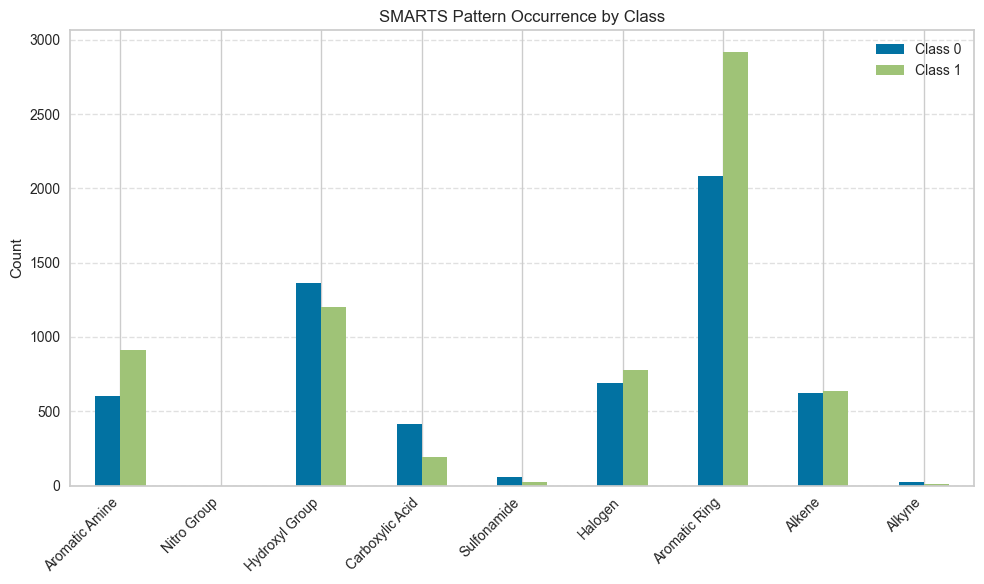

In [22]:
########################################  Analyze SMARTS Substructures ######################################## 

analyzer.summarize_patterns(data_with_flags)

__________

### 8. 📈 Visualize correlation between features  ###

### Feature Correlation Heatmaps

Correlation matrices help identify:
- Redundant features
- Feature interactions
- Potential for multicollinearity

We visualize correlations for numeric descriptors:
```python
EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)
```

You can also visualize for multiple dataset by:
```python
EDAVisualizer.compare_correlation_heatmaps(
    dfs=[train_df, valid_df, test_df],
    df_names=["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings']
)


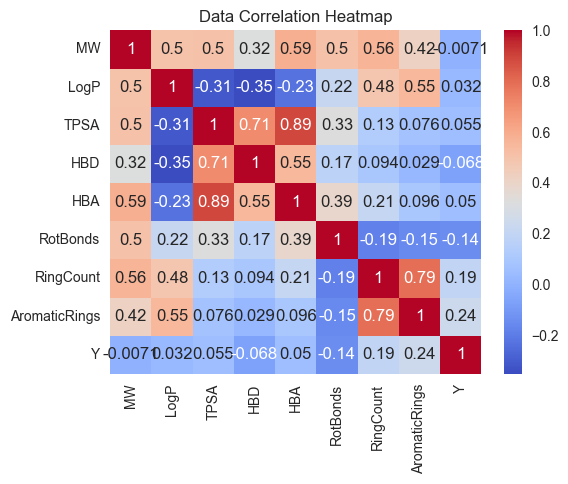

In [23]:
######################################## Show Correlation Heatmaps for Molecular Descriptors ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)


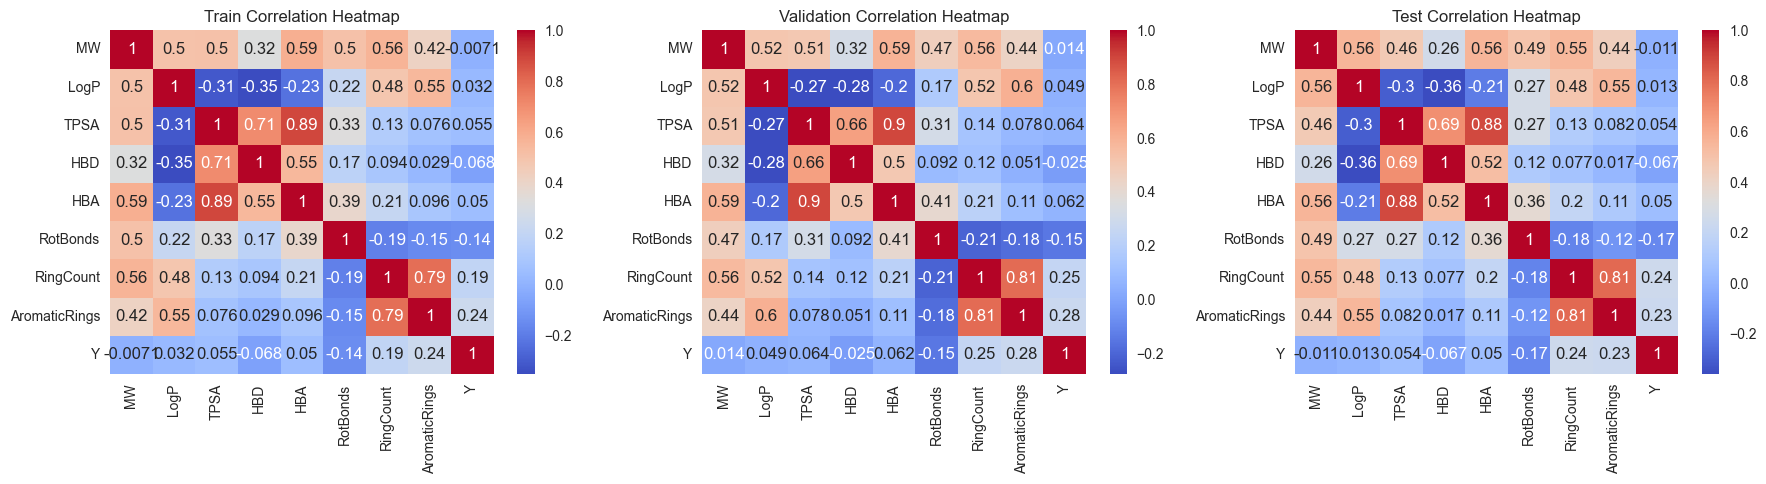

In [24]:
######################################## Check Correlation Heatmaps across Splits ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [main_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)

### Boxplot of Numeric Features Across Splits

Boxplots give another visual cue on median, spread, and outliers per descriptor.

Use:
```python
EDAVisualizer.compare_boxplots(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Validation', 'Test'],
    col='MW'
)


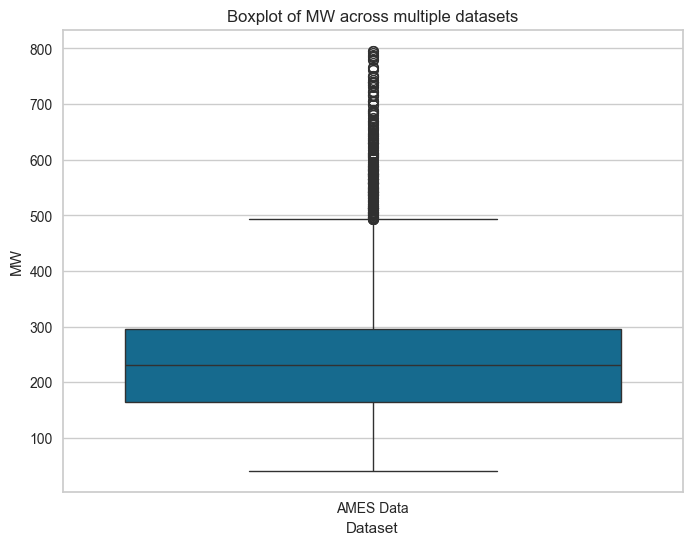

In [25]:
######################################## Compare MW Boxplots ######################################## 

EDAVisualizer.compare_boxplots(
    [main_df],
    ["AMES Data"],
    col='MW'
)

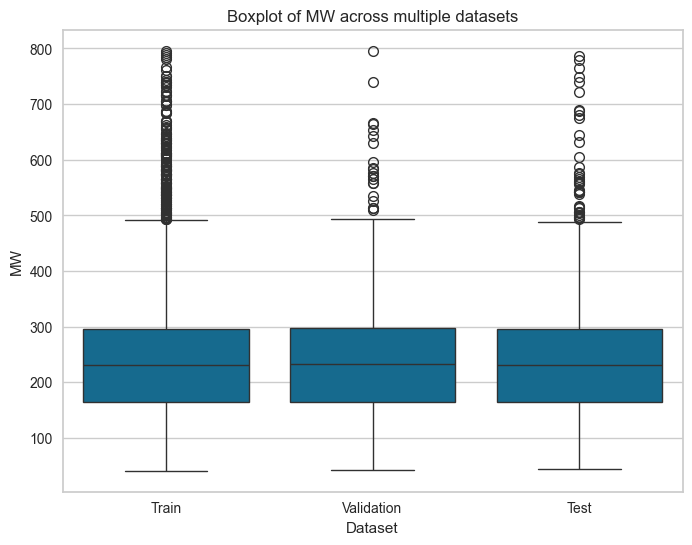

In [26]:
######################################## Compare MW Boxplots ######################################## 

EDAVisualizer.compare_boxplots(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='MW'
)

### Compare Feature Distributions (Histogram)

Distribution shifts between train/test datasets can impact model generalization. Here, we compare numeric descriptor histograms.

Example:
```python
EDAVisualizer.compare_numeric_distribution(
    dfs=[train_df, test_df],
    df_names=['Train', 'Test'],
    col='MW'  # or LogP, TPSA, etc.
)


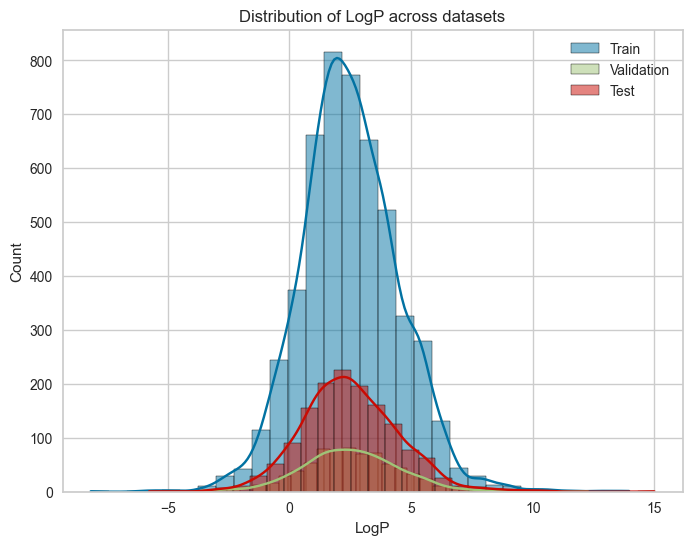

In [ ]:
######################################## Compare partition coefficient between octanol and water ######################################## 

EDAVisualizer.compare_numeric_distribution(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='LogP'
)

_____________

### 9. 🔍 Visual Inspection of Molecules ###

Before building models, it’s helpful to get a “chemical feel” for the data by visualizing molecules per class.

This function:
- Randomly samples `n` molecules per class
- Converts them to RDKit molecules
- Displays them with grid labels

Usage:
```python
EDAVisualizer.draw_samples_by_class(main_df, n=4)



🧪 5 molecules for class 1


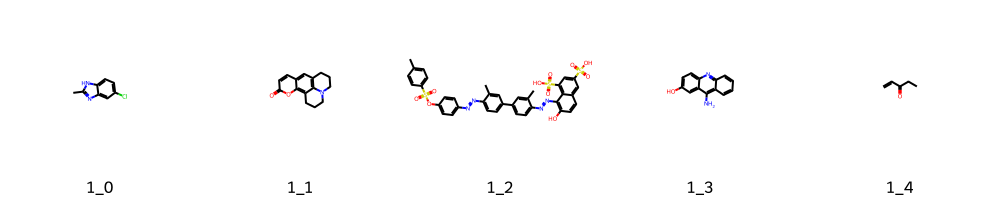

🧪 5 molecules for class 0


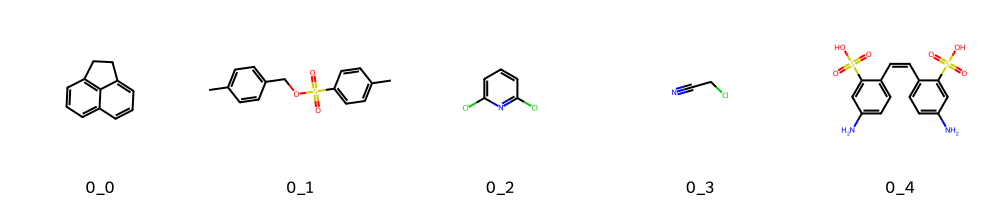

In [28]:
######################################## Visualize "n" samples of molecules per class ########################################
EDAVisualizer.draw_samples_by_class(main_df, n=5)

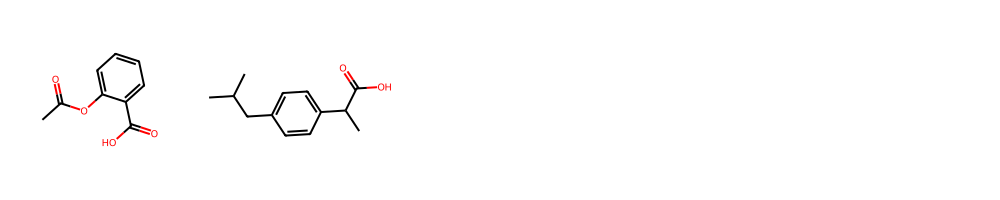

In [29]:
######################################## Draw Sample DRUG SMILE ########################################

EDAVisualizer.draw_molecules([
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # Aspirin
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"  # Ibuprofen
])

________

## 🧬 Molecular Featurization using Ersilia Representation Model

### **1. Extended Reduced Graph (ErG)** ###

In this phase, each molecule in the AMES dataset is converted into a numerical vector representation using The **ErG 2D Descriptors** representation model  from the **[Ersilia Model Hub](https://www.ersilia.io/model-hub)**.

> The Extended Reduced Graph (ErG) approach encodes pharmacophoric properties of molecules by describing their pharmacophore nodes.  
> This model (`eos5guo`) captures the size, shape, and functional characteristics of molecules, making it particularly effective for identifying pharmacophoric patterns.  
> It was benchmarked against Daylight fingerprints and outperformed them in 10 out of 11 tasks.  
> ErG descriptors are especially useful in **scaffold hopping**, a key strategy in drug discovery.

📦 **Model:** `eos5guo`  
🔗 **Source Code:** [github.com/ersilia-os/eos5guo](https://github.com/ersilia-os/eos5guo)  
📖 **Reference Publication:** [10.1021/ci050457y](https://pubs.acs.org/doi/10.1021/ci050457y)

### How the process works:

- The `MolecularFeaturiser` class checks if the model is installed. If not, it **automatically fetches it** using the Ersilia Python SDK.
- The `MolecularFeaturiser` can also be initiated using CLI by setting `use_python_api=False`
- Additionally, by setting `auto_serve=True`, the class tries serving using Python SDK first; but if it fails, switches to CLI mode and logs both events and confirms when initialization is successful.
- It then applies the model to the `train`, `val`, and `test` splits of the AMES dataset.
- This will featurize the train, validation, and test splits.
- Each SMILES string is transformed into a high-dimensional vector representation.
- The output is stored as new CSV files (e.g., `train_eos5axz_features.csv`) inside `data/AMES/splits/`.
- Then the featurization can be executed and preview the results.


In [5]:
######################################## Initialize featurizer ########################################
featuriser = MolecularFeaturiser(dataset_name=dataset, model_id="eos5guo")

2025-04-03 12:29:20,426 - INFO - [API] Initializing Ersilia model: eos5guo
2025-04-03 12:29:41,922 - INFO - ✅ Model initialized Succesfully


In [ ]:
######################################## Run featurization across all dataset splits ######################################## 

featuriser.featurise_all_splits()

2025-04-03 05:34:46,558 - INFO - [+] Featurizing /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/train.csv -> /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/train_eos5guo_features.csv
2025-04-03 05:34:58,456 - INFO - Deleted temporary file: /var/folders/5g/d1fz9jw119x57smh9smql2m00000gn/T/tmpr9_heruh.csv
2025-04-03 05:34:58,457 - INFO - Deleted temporary file: /var/folders/5g/d1fz9jw119x57smh9smql2m00000gn/T/tmpr9_heruh_output.csv
2025-04-03 05:34:58,470 - INFO - Attempting to merge labels from /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/AMES.csv
2025-04-03 05:34:58,480 - WARNING - Could not merge labels: 'input'
2025-04-03 05:34:58,875 - INFO - Featurization completed in 12.32 seconds for train split.
2025-04-03 05:34:58,876 - INFO - [+] Featurizing /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid.csv -> /Users/taiwoadelakin/Documents/D

In [ ]:
######################################## Load and preview featurized dataset among splits ######################################## 

split_paths = {
    split: featuriser.get_featurized_path(split)
    for split in ["train", "valid", "test"]
}


In [ ]:
######################################## Read featurized Split Datasets ######################################## 

df_feat_train = pd.read_csv(split_paths["train"])
df_feat_valid   = pd.read_csv(split_paths["valid"])
df_feat_test  = pd.read_csv(split_paths["test"])

In [ ]:
######################################## Print Shape of Featurized Splits ######################################## 

print("Featurized Train shape:", df_feat_train.shape)
print("Featurized Validation shape:", df_feat_valid.shape)
print("Featurized Test shape:", df_feat_test.shape)


Featurized Train shape: (5094, 318)
Featurized Validation shape: (728, 318)
Featurized Test shape: (1456, 318)


___________

### **2. Morgan Fingerprints (Binary) Representation** ###

In this phase, each molecule in the dataset is transformed into a fixed-length binary vector using the **Morgan Fingerprints in binary form** model from the **[Ersilia Model Hub](https://www.ersilia.io/model-hub)**.

> Morgan fingerprints are among the most widely used molecular representations in cheminformatics.  
> They generate circular fingerprints by examining atom-centered environments up to a certain radius.  
> This model (`eos4wt0`) uses **radius = 3** and produces **2048-dimensional binary vectors**, where each bit indicates the **presence** of a substructure.  
> This binary form is compact and efficient for tasks where presence/absence is more important than frequency.

📦 **Model:** `eos4wt0`  
🔗 **Source Code:** [github.com/ersilia-os/eos4wt0](https://github.com/ersilia-os/eos4wt0)  
🐳 **DockerHub:** [hub.docker.com/r/ersiliaos/eos4wt0](https://hub.docker.com/r/ersiliaos/eos4wt0)  
📖 **Reference Publication:** [PubMed ID 20426451](https://pubmed.ncbi.nlm.nih.gov/20426451/)


### How the process works:

- The `MolecularFeaturiser` class checks if the model is installed. If not, it **automatically fetches it** using the Ersilia Python SDK.
- The `MolecularFeaturiser` can also be initiated using CLI by setting `use_python_api=False`
- Additionally, by setting `auto_serve=True`, the class tries serving using Python SDK first; but if it fails, switches to CLI mode and logs both events and confirms when initialization is successful.
- It then applies the model to the `train`, `val`, and `test` splits of the AMES dataset.
- This will featurize the train, validation, and test splits.
- Each SMILES string is transformed into a high-dimensional vector representation.
- The output is stored as new CSV files (e.g., `train_eos5axz_features.csv`) inside `data/AMES/splits/`.
- Then the featurization can be executed and preview the results.


In [3]:
######################################## Initialize featurizer ########################################
featuriser = MolecularFeaturiser(dataset_name=dataset, model_id="eos4wt0")

2025-04-05 06:56:42,885 - INFO - [API] Initializing Ersilia model: eos4wt0
2025-04-05 06:57:00,373 - INFO - ✅ Model initialized Succesfully


In [4]:
######################################## Run featurization across all dataset splits ######################################## 

featuriser.featurise_all_splits()

2025-04-05 06:57:07,692 - INFO - [+] Featurizing /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/train.csv -> /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/train_eos4wt0_features.csv
2025-04-05 07:00:32,840 - INFO - Deleted temporary file: /var/folders/5g/d1fz9jw119x57smh9smql2m00000gn/T/tmpfxm6wh_p.csv
2025-04-05 07:00:32,841 - INFO - Deleted temporary file: /var/folders/5g/d1fz9jw119x57smh9smql2m00000gn/T/tmpfxm6wh_p_output.csv
2025-04-05 07:00:32,858 - INFO - Attempting to merge labels from /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/AMES.csv
2025-04-05 07:00:32,867 - WARNING - Could not merge labels: 'input'
2025-04-05 07:00:33,744 - INFO - Featurization completed in 206.05 seconds for train split.
2025-04-05 07:00:33,748 - INFO - [+] Featurizing /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid.csv -> /Users/taiwoadelakin/Documents/

In [5]:
######################################## Load and preview featurized dataset among splits ######################################## 

split_paths = {
    split: featuriser.get_featurized_path(split)
    for split in ["train", "valid", "test"]
}


In [6]:
######################################## Read featurized Split Datasets ######################################## 

df_feat_train = pd.read_csv(split_paths["train"])
df_feat_valid   = pd.read_csv(split_paths["valid"])
df_feat_test  = pd.read_csv(split_paths["test"])

In [7]:
######################################## Print Shape of Featurized Splits ######################################## 

print("Featurized Train shape:", df_feat_train.shape)
print("Featurized Validation shape:", df_feat_valid.shape)
print("Featurized Test shape:", df_feat_test.shape)

Featurized Train shape: (5094, 2051)
Featurized Validation shape: (728, 2051)
Featurized Test shape: (1456, 2051)


___

## 🤖 Modelling

### **1. 📂 Data Preprocessing** ###

This section loads the featurized dataset splits (train, validation, and test) using the `ModelPreprocessor` class from `model_utils.py`.  
The preprocessor intelligently detects the correct feature columns based on a prefix pattern (e.g., `Mol_feat_`, `Drug1_feat_`, etc.) and extracts both the features and the target (`Y`) for modeling.

The usage depends on the nature of your dataset:

---

#### A. 🧬💊 For Single Molecule Datasets
Use this if your featurized dataset includes a single input molecule column (e.g., `Drug`, `SMILES`, or `input`), and features are prefixed with `"Mol_feat_"` (default).

1. Set your dataset name and model ID e.g. `category = 'tox'`, `dataset = 'AMES'`, `model_id = 'eos5guo'`

2. Initialize the preprocessor (Mol_feat_ is default, so no need to specify): `preprocessor = ModelPreprocessor(dataset_name=dataset, model_id=model_id)`

3. Load and split the featurized data: `X_train, y_train, X_valid, y_valid, X_test, y_test = preprocessor.preprocess()`

#### B. 🧬💊🧬💊 For Combination Drug Datasets (e.g. Drug1/Drug2)
Use this when the dataset has two drug inputs (e.g., Drug1, Drug2) and each has been featurized separately. This setup expects features prefixed with `"Drug1_feat_"` and `"Drug2_feat_"`.

1. Set your dataset name,  model ID and feature_prefixes e.g. `category = 'tox'`, `dataset = 'AMES'`, `model_id = 'eos5guo'`, `feature_prefixes = ["Drug1_feat_", "Drug2_feat_"]`

2. Initialize the preprocessor: `preprocessor = ModelPreprocessor(dataset_name=dataset, model_id=model_id, feature_prefix=feature_prefixes)`

3. Load and split the featurized data: `X_train, y_train, X_valid, y_valid, X_test, y_test = preprocessor.preprocess()`

____

**Ensure Initializing `ModelTrainer`** afterwards with preprocessed train/valid/test sets  afterwards  before  model training
    

In [30]:
model_id = "eos5guo"

In [31]:
######################################## Initialize the preprocessor ########################################
preprocessor = ModelPreprocessor(dataset_name=dataset, model_id=model_id)

2025-04-06 11:38:54,857 - INFO - 🚦 Auto-featurise mode is ON
2025-04-06 11:38:54,859 - INFO - 📂 Checking for featurized files in: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits
2025-04-06 11:38:54,860 - INFO - ✅ All featurized files found. Skipping featurisation.


In [32]:
######################################## Load and split the featurized data ########################################
X_train, y_train, X_valid, y_valid, X_test, y_test = preprocessor.preprocess()

2025-04-06 11:38:57,038 - INFO - 📄 Loading featurized split: train_eos5guo_features.csv
2025-04-06 11:38:57,117 - INFO - 📄 Loading featurized split: valid_eos5guo_features.csv
2025-04-06 11:38:57,130 - INFO - 📄 Loading featurized split: test_eos5guo_features.csv
2025-04-06 11:38:57,156 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_train because: (dtype=object)
2025-04-06 11:38:57,159 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_valid because: (dtype=object)
2025-04-06 11:38:57,160 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_test because: (dtype=object)
2025-04-06 11:38:57,162 - INFO - ✅ Preprocessing Complete

2025-04-06 11:38:57,162 - INFO - 📊 Dataset Summary:
2025-04-06 11:38:57,162 - INFO -    • X_train: (5094, 315) =====> y_train: (5094,)
2025-04-06 11:38:57,162 - INFO -    • X_valid: (728, 315) =====> y_valid: (728,)
2025-04-06 11:38:57,163 - INFO -    • X_test:  (1456, 315) =====> y_test:  (1456,)

2025-04-06 11:38:57,163 - INFO - 🏷️ Target Distribution

In [33]:
######################################## Initialize trainer ########################################
trainer = ModelTrainer(X_train, y_train, X_valid, y_valid, X_test, y_test, experiment_name=dataset)

______

### **2. 🧭 Model Exploration with PyCaret** ###

In this section, **PyCaret**, a powerful low-code machine learning library, was used to quickly explore, compare, and evaluate multiple classification models on the featurized dataset.

### ❓ Why PyCaret?

PyCaret helps to:

- Run a **head-to-head comparison** of dozens of classifiers in seconds
- Get performance metrics like Accuracy, AUC, Recall, Precision, and F1
- Select a **baseline model** that performs well before deeper tuning
- Export results and seamlessly switch to custom training

It accelerates the modeling phase while allowing for later refinement or swap models using custom code.


### 💡 How To Use It

There's an encapsulated PyCaret logic inside the custom `ModelTrainer` class in `scripts/model_utils.py`. Here's what happens:

1. **After already Initializing `ModelTrainer`** with preprocessed train/valid/test sets in the previous cell.
2. **Run `run_pycaret()`** to start the AutoML workflow.
3. **Call `log_results()`** to review the top-performing models.
4. **Optionally use `tune_model_with_pycaret()`** to fine-tune a specific model.
5. Save, evaluate, or continue with the selected model.


In [34]:
######################################## Run PyCaret AutoML ########################################
trainer.run_pycaret()

⚙️ Initializing PyCaret...


⚖️ Comparing models...


✅ Best model selected: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
######################################## View PyCaret Leaderboard ########################################
trainer.log_results()

📋 PyCaret Leaderboard:


Model  Accuracy     AUC  Recall      F1  \
rf               Random Forest Classifier    0.7621  0.8336  0.7654  0.7771   
lightgbm  Light Gradient Boosting Machine    0.7621  0.8307  0.7561  0.7750   
et                 Extra Trees Classifier    0.7585  0.8240  0.7514  0.7712   
xgboost         Extreme Gradient Boosting    0.7560  0.8263  0.7581  0.7709   
gbc          Gradient Boosting Classifier    0.7346  0.7998  0.7333  0.7497   

           Kappa  TT (Sec)  
rf        0.5222     0.120  
lightgbm  0.5230     0.383  
et        0.5158     0.125  
xgboost   0.5100     0.108  
gbc       0.4676     0.391

_____

### **3. 🛠️ Hyperparameter Tuning with PyCaret** ###

After selecting the best baseline model by PyCaret, the `tune_model()` function can be used to suggest optimization for its hyperparameters.

### ❓Why Tune?

- To try and improve performance 
- Explore different parameters like tree depths, number of estimators, splits, etc.
- Let PyCaret automatically test multiple parameter combinations and choose the best.

This uses the `tune_model_with_pycaret()` method from the `ModelTrainer` class in `scripts/model_utils.py`.


##### 1️⃣  Top ranked model selected by PyCaret (Random Forest 🌳)
Random Forest was selected as the best-performing model during the initial PyCaret AutoML comparison. To further enhance its performance, PyCaret’s `tune_model()` utility was applied.

This tuning step performs an optimized search over different hyperparameter combinations (e.g., number of trees, maximum depth, split criteria) and selects the configuration that yields the best performance on cross-validation folds.

The goal here is to explore the upper bound of Random Forest’s potential before making final comparisons or selections.

In [36]:
######################################## Tune the top model selected by PyCaret (Random Forest) ########################################
pyC_tuned_rf = trainer.tune_model_with_pycaret(RandomForestClassifier(), n_iter=150)

🛠️ Tuning RandomForestClassifier...


Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##### 2️⃣  Second Ranked model selected by PyCaret (Light Gradient Boosting Machine 🌀)

Since LightGBM was the second-best model from PyCaret’s AutoML comparison, it'll now be tuned to see if hyperparameter optimization can improve its performance.

PyCaret’s `tune_model()` function will automatically try multiple configurations (by default, 50) using cross-validation and return the best one.

This step helps to explore the LightGBM model’s potential with smarter settings, and allows to benchmark it more fairly against the best model so far (Random Forest).

In [37]:
######################################## Tune the second model selected by PyCaret (Light GBM) ########################################
pyC_tuned_lgbm = trainer.tune_model_with_pycaret(LGBMClassifier(), n_iter=150)

🛠️ Tuning LGBMClassifier...


Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Metric  Random Forest  LightGBM
0   Accuracy       0.743132  0.743132
1   F1 Score       0.769420  0.769420
2  Precision       0.791878  0.791878
3     Recall       0.748201  0.748201
4        AUC       0.823224  0.834262
5      Kappa       0.480024  0.480024
6        MCC       0.481009  0.481009

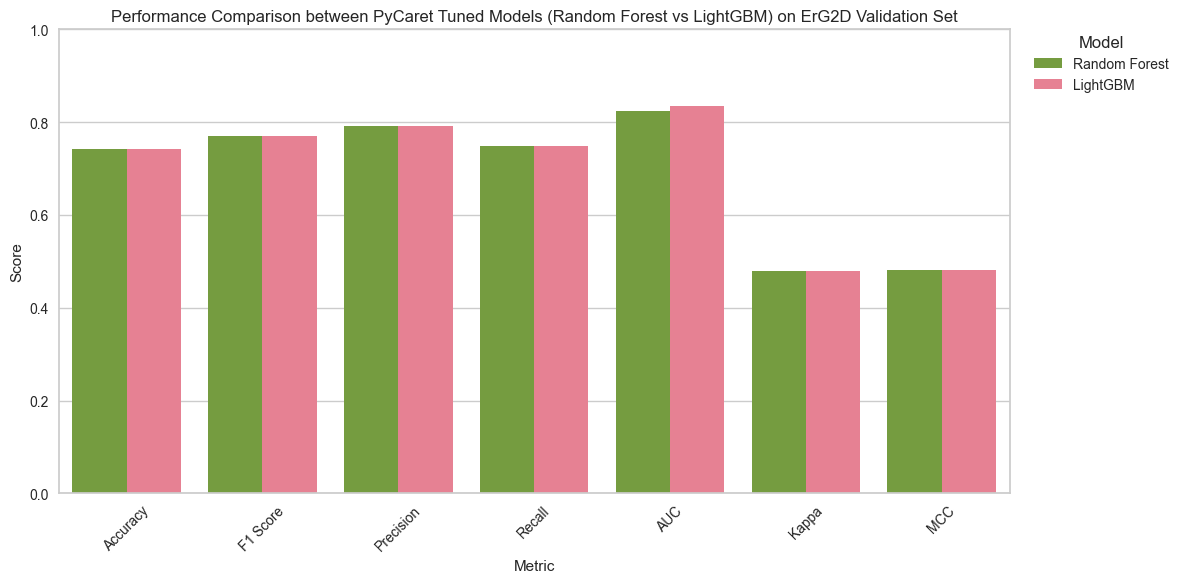

In [38]:
######################################## Compare Pycaret Best Models Evaluation ########################################
trainer.compare_models_on_metrics(models=[pyC_tuned_rf, pyC_tuned_lgbm], 
                                  model_names=["Random Forest", "LightGBM"], 
                                  plot_title="Performance Comparison between PyCaret Tuned Models (Random Forest vs LightGBM) on ErG2D Validation Set")

Metric  Random Forest  LightGBM
0   Accuracy       0.768544  0.775412
1   F1 Score       0.784113  0.789711
2  Precision       0.802097  0.811096
3     Recall       0.766917  0.769424
4        AUC       0.841617  0.845398
5      Kappa       0.534938  0.549097
6        MCC       0.535563  0.549977

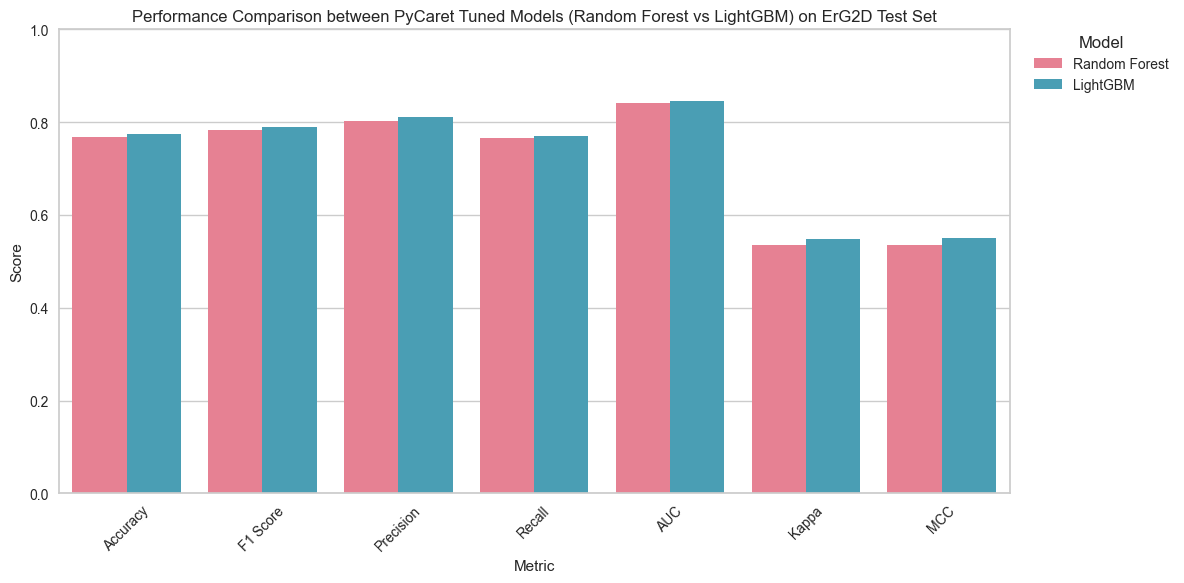

In [39]:
######################################## Compare Pycaret Best Models Evaluation ########################################
trainer.compare_models_on_metrics(models=[pyC_tuned_rf, pyC_tuned_lgbm], 
                                  model_names=["Random Forest", "LightGBM"],
                                  dataset="test",                                
                                  plot_title="Performance Comparison between PyCaret Tuned Models (Random Forest vs LightGBM) on ErG2D Test Set")

______

### **4. 🔧 Hyperparameter Tuning with GridSearchCV** ###

In this section, the hyperparameters of the top-performing models from PyCaret are manually tuned using `GridSearchCV`. The goal is to fine-tune the model performance beyond the AutoML tuning provided by PyCaret.


#### ❓ Why use GridSearchCV?
While PyCaret has already given a solid baseline and performed automatic tuning, `GridSearchCV` provides:

- 🕹️ **Full control** over the hyperparameter space  
- 🔁 **Cross-validation** to ensure generalization of the model  
- 🪞 **Transparency**: We explicitly define and test parameter combinations  
- 🦾 **Flexibility**: Easy to apply across different models and use cases


This process will be applied to both:
1. **Random Forest** – the best performer from PyCaret AutoML
2. **LightGBM** – the second-best with very close metrics

Once each model is tuned:
- It’ll be trained using the best parameters from GridSearch
- Then compare their **final evaluation metrics side-by-side**

> This will help choose the most reliable model.

##### 1️⃣ GridSearchCV: Random Forest 🌳

In [48]:
######################################## Define parameter grid for Random Forest tuning ########################################

rf_param_grid = {
    "n_estimators": list(range(50, 301, 50)),
    "max_depth": [None] + list(range(5, 31, 5)),
    "min_samples_split": list(range(2, 5)),
    "min_samples_leaf": list(range(1, 4)),
    "max_features": ["sqrt", "log2"]
}

In [49]:
######################################## Initialize the model ########################################
rf_base = RandomForestClassifier(random_state=42)

In [50]:
# Setup GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [51]:
# Fit GridSearchCV on training data
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [52]:
######################################## Best GridCV Parameters for RF ########################################
print(f"✨ Best GridCV Parameters (Random Forest):\n {rf_grid.best_params_}")

✨ Best GridCV Parameters (Random Forest):
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [53]:
########################################  Retrieve best params and reinstantiate clean model ########################################
bestGrid_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)

In [54]:
######################################## Train model with best GridSearchCV params ########################################
trained_rf = trainer.train_selected_model(bestGrid_rf)

🔧 Training selected model: RandomForestClassifier


In [55]:
######################################## Evaluate model on validation set ########################################
trainer.evaluate_model(trained_rf)

📊 Evaluation Metrics on Validation Set:
Accuracy: 0.7445
AUC: 0.8398
Recall: 0.7554
Precision: 0.7895
F1 Score: 0.7721
Kappa: 0.4818
MCC: 0.4824
Time taken (seconds): 0.11


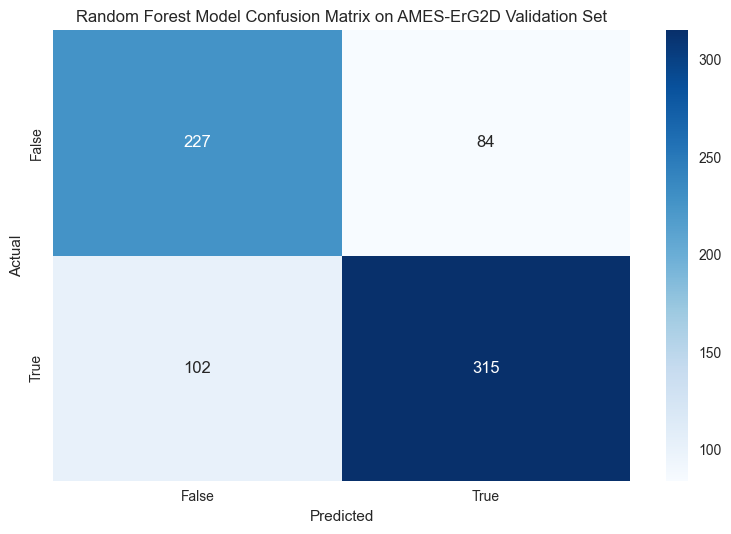

In [56]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_rf, plot_title= "Random Forest Model Confusion Matrix on AMES-ErG2D Validation Set")

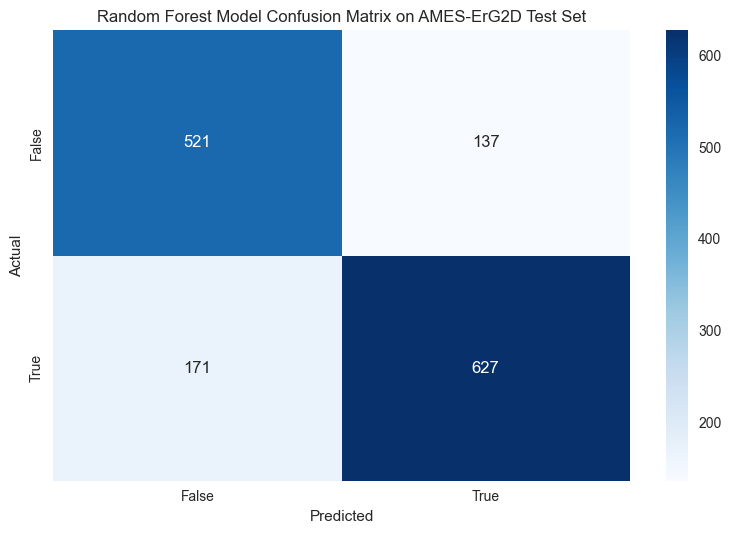

In [57]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_rf, dataset="test", plot_title= "Random Forest Model Confusion Matrix on AMES-ErG2D Test Set")

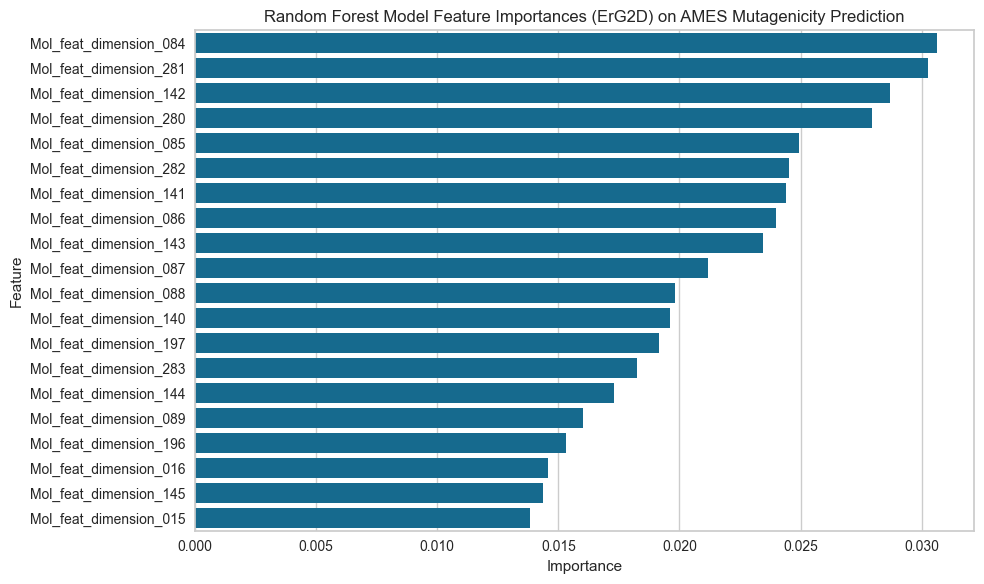

In [58]:
######################################## Plot feature importances ########################################
trainer.plot_feature_importance(plot_title="Random Forest Model Feature Importances (ErG2D) on AMES Mutagenicity Prediction")

Metric  Random Forest (PyCaret)  Random Forest (GridCV)
0   Accuracy                 0.743132                0.744505
1   F1 Score                 0.769420                0.772059
2  Precision                 0.791878                0.789474
3     Recall                 0.748201                0.755396
4        AUC                 0.823224                0.839764
5      Kappa                 0.480024                0.481755
6        MCC                 0.481009                0.482362

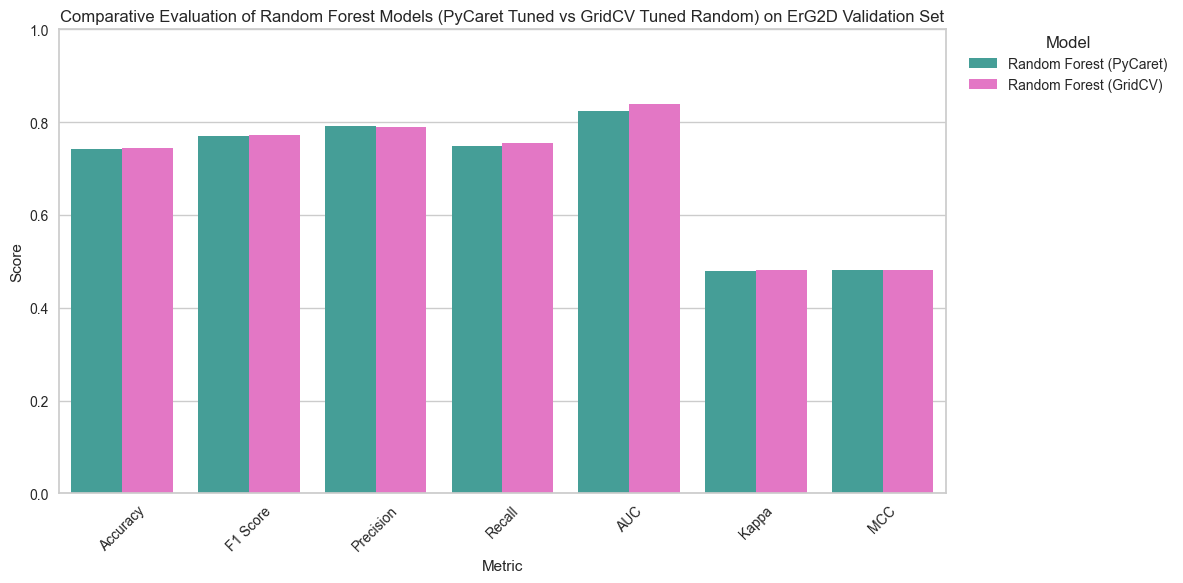

In [59]:
######################################## Compare Pycaret RF Models  vs GridCV RF Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_rf, bestGrid_rf], 
                                  model_names=["Random Forest (PyCaret)", "Random Forest (GridCV)"], 
                                  plot_title= "Comparative Evaluation of Random Forest Models (PyCaret Tuned vs GridCV Tuned Random) on ErG2D Validation Set")

Metric  Random Forest (PyCaret)  Random Forest (GridCV)
0   Accuracy                 0.768544                0.788462
1   F1 Score                 0.784113                0.802817
2  Precision                 0.802097                0.820681
3     Recall                 0.766917                0.785714
4        AUC                 0.841617                0.861360
5      Kappa                 0.534938                0.574902
6        MCC                 0.535563                0.575536

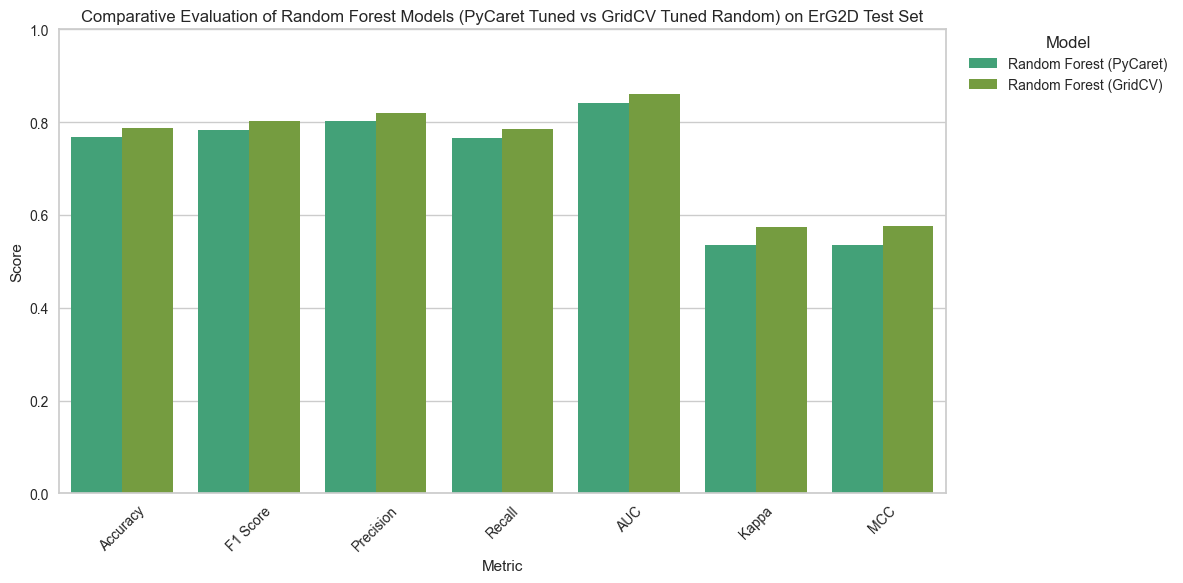

In [60]:
######################################## Compare Pycaret RF Models  vs GridCV RF Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_rf, bestGrid_rf], 
                                  model_names=["Random Forest (PyCaret)", "Random Forest (GridCV)"], 
                                  dataset="test",
                                  plot_title= "Comparative Evaluation of Random Forest Models (PyCaret Tuned vs GridCV Tuned Random) on ErG2D Test Set")

______

##### 2️⃣ GridSearchCV: Light Gradient Boosting Machine 🌀

In [76]:
######################################## Define LightGBM Param Grid ########################################
# lgbm_param_grid = {
#     "n_estimators": list(range(50, 201, 50)),
#     "max_depth": [None] + list(range(5, 31, 5)),
#     "learning_rate": [0.01, 0.05, 0.1],
#     "num_leaves": [15, 31, 63],
#     "min_child_samples": [10, 20, 30],
#     "subsample": [0.8, 1.0],
#     "colsample_bytree": [0.8, 1.0]
# }

lgbm_param_grid = {
    "n_estimators": [200, 250, 300],
    "max_depth": [None, 10, 20],
    "learning_rate": [0.05, 0.1, 0.2],
    "min_child_samples": [10, 20],              
    "subsample": [0.8, 1.0],                      
    "colsample_bytree": [0.8, 1.0],               
}

In [77]:
######################################## Setup GridSearchCV for LightGBM ########################################
lgbm_base = LGBMClassifier(random_state=42)

In [78]:
######################################## Setup GridSearchCV ########################################
lgbm_grid = GridSearchCV(
    estimator=lgbm_base,
    param_grid=lgbm_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [79]:
######################################## Run GridSearch for LightGBM ########################################
lgbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2208, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5367
[LightGBM] [Info] Number of data points in the train set: 4075, number of used features: 285
[LightGBM] [Info] [binary:Boost

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=None, num_leaves=31,
                                      objective=None, random_state=42,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [None, 10, 20],
                         'min_child_samples': [10, 20],
                         'n_estimators': [200, 250, 300],
                         'subsample': [0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [80]:
######################################## Get Best LightGBM Params ########################################
print(f"✨ Best Grid Parameters (LightGBM):\n {lgbm_grid.best_params_}")

✨ Best Grid Parameters (LightGBM):
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 250, 'subsample': 0.8}


In [81]:
######################################## Extract the best LightGBM model found during GridSearchCV ########################################
bestGrid_lgbm = lgbm_grid.best_estimator_

In [82]:
######################################## Train Tuned LightGBM ########################################
trained_lgbm = trainer.train_selected_model(bestGrid_lgbm)

🔧 Training selected model: LGBMClassifier
[LightGBM] [Info] Number of positive: 2759, number of negative: 2335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5766
[LightGBM] [Info] Number of data points in the train set: 5094, number of used features: 272
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541618 -> initscore=0.166856
[LightGBM] [Info] Start training from score 0.166856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [83]:
######################################## Evaluate Tuned LightGBM ########################################
trainer.evaluate_model(trained_lgbm)

📊 Evaluation Metrics on Validation Set:
Accuracy: 0.7679
AUC: 0.8536
Recall: 0.7626
Precision: 0.8196
F1 Score: 0.7901
Kappa: 0.5312
MCC: 0.5329
Time taken (seconds): 0.03


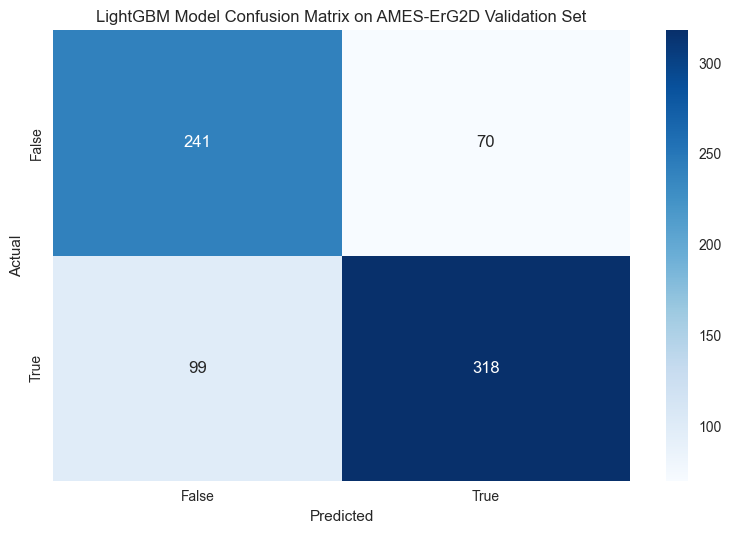

In [84]:
######################################## LightGBM Confusion Matrix ########################################
trainer.plot_confusion_matrix(trained_lgbm, plot_title= "LightGBM Model Confusion Matrix on AMES-ErG2D Validation Set")

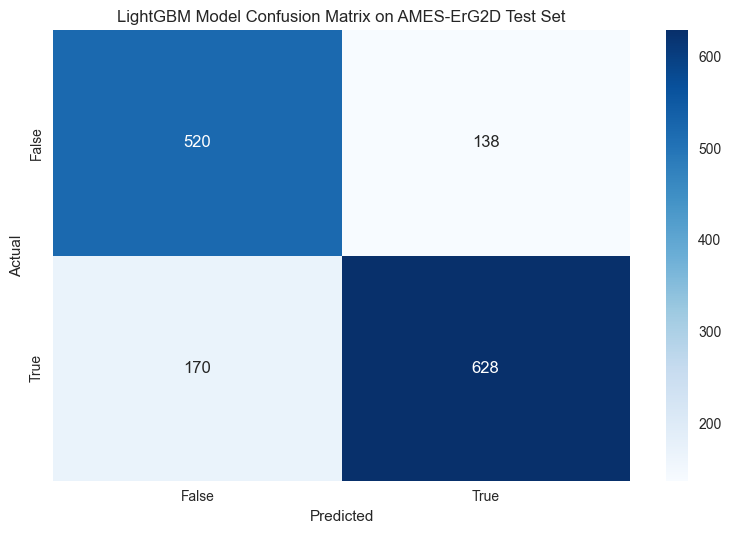

In [85]:
######################################## LightGBM Confusion Matrix ########################################
trainer.plot_confusion_matrix(trained_lgbm, dataset="test", plot_title= "LightGBM Model Confusion Matrix on AMES-ErG2D Test Set")

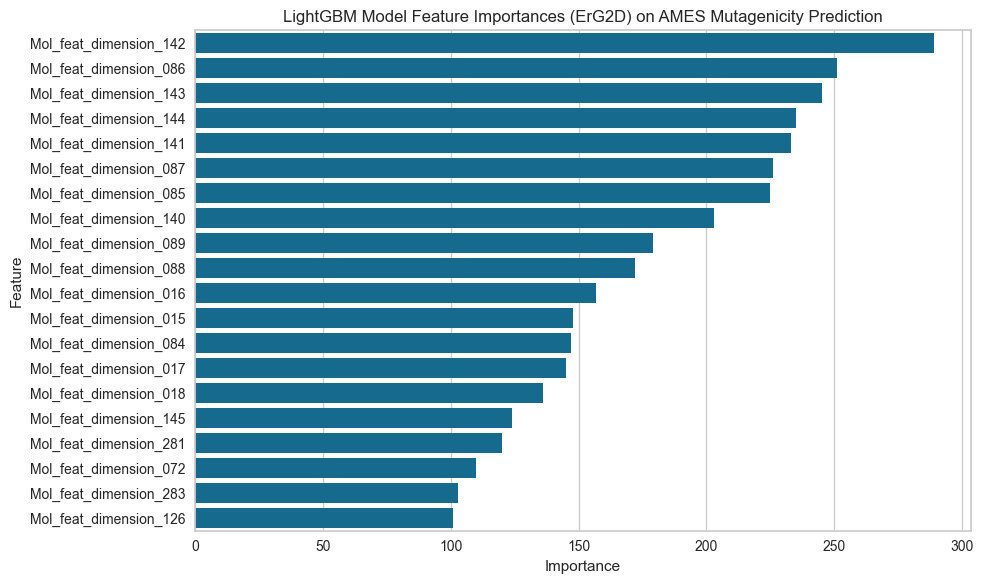

In [86]:
######################################## Feature Importance Plot for LightGBM ########################################
trainer.plot_feature_importance(plot_title="LightGBM Model Feature Importances (ErG2D) on AMES Mutagenicity Prediction")

Metric  LightGBM (PyCaret)  LightGBM (GridCV)
0   Accuracy            0.743132           0.767857
1   F1 Score            0.769420           0.790062
2  Precision            0.791878           0.819588
3     Recall            0.748201           0.762590
4        AUC            0.834262           0.853586
5      Kappa            0.480024           0.531214
6        MCC            0.481009           0.532941

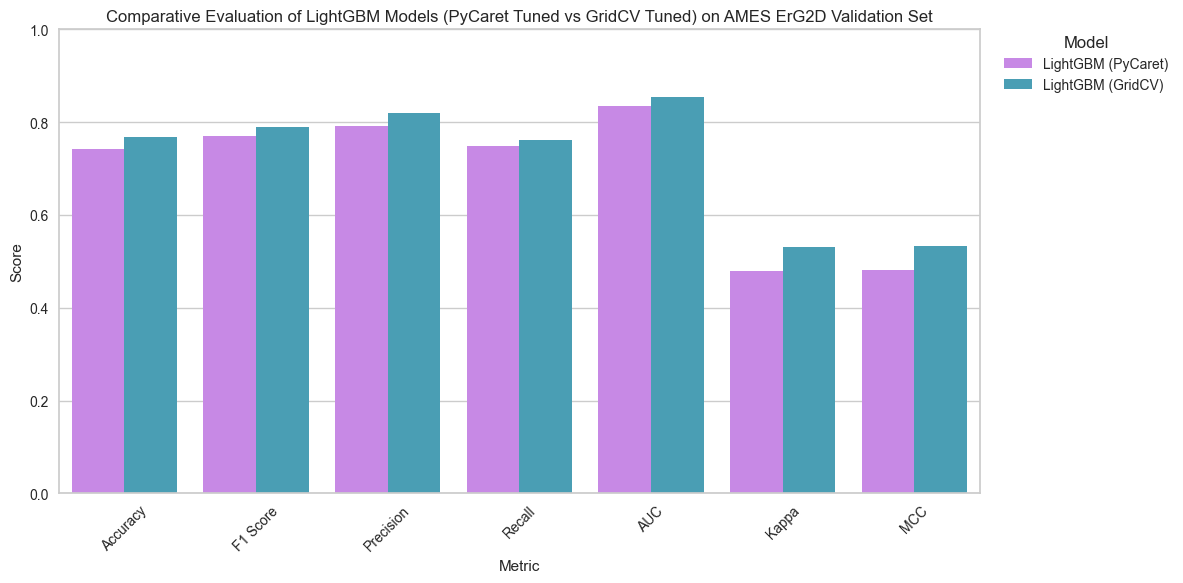

In [87]:
######################################## Compare Pycaret LightGBM Models  vs GridCV LightGBM Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_lgbm, bestGrid_lgbm], 
                                  model_names=["LightGBM (PyCaret)", "LightGBM (GridCV)"],
                                  plot_title="Comparative Evaluation of LightGBM Models (PyCaret Tuned vs GridCV Tuned) on AMES ErG2D Validation Set")

Metric  LightGBM (PyCaret)  LightGBM (GridCV)
0   Accuracy            0.775412           0.788462
1   F1 Score            0.789711           0.803069
2  Precision            0.811096           0.819843
3     Recall            0.769424           0.786967
4        AUC            0.845398           0.862633
5      Kappa            0.549097           0.574789
6        MCC            0.549977           0.575351

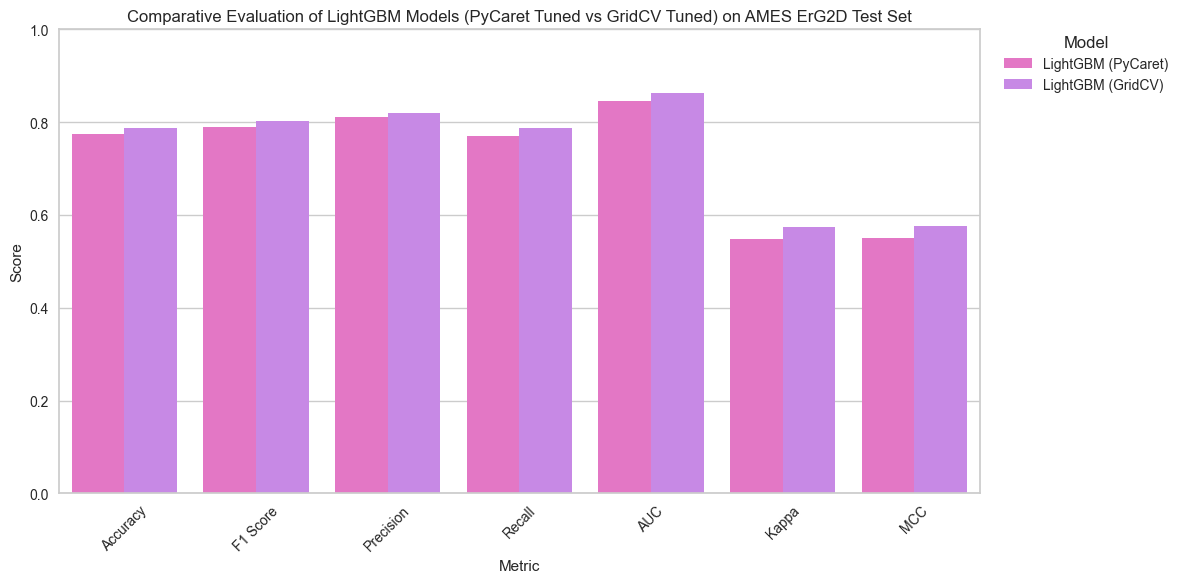

In [88]:
######################################## Compare Pycaret LightGBM Models  vs GridCV LightGBM Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_lgbm, bestGrid_lgbm], 
                                  model_names=["LightGBM (PyCaret)", "LightGBM (GridCV)"], 
                                  dataset="test",
                                  plot_title="Comparative Evaluation of LightGBM Models (PyCaret Tuned vs GridCV Tuned) on AMES ErG2D Test Set")

_______

### **5. ☑️ Select Model and Save** ###

After benchmarking multiple models—through both **automated tuning using PyCaret** and **manual tuning with GridSearchCV**, the **best-performing model** will be selected based on key evaluation metrics like **F1-score**, **AUC**, and overall robustness.

This step finalizes the modeling pipeline by preserving the most optimized model for future use.

#### What to do:

☑️ **Select** the model that consistently performs best or very well 
💾 **Save** the model using `joblib` for reuse in inference, deployment, or testing  
♻️ **Ensure reproducibility** without needing to retrain


Metric  Random Forest  Light GBM
0   Accuracy       0.744505   0.767857
1   F1 Score       0.772059   0.790062
2  Precision       0.789474   0.819588
3     Recall       0.755396   0.762590
4        AUC       0.839764   0.853586
5      Kappa       0.481755   0.531214
6        MCC       0.482362   0.532941

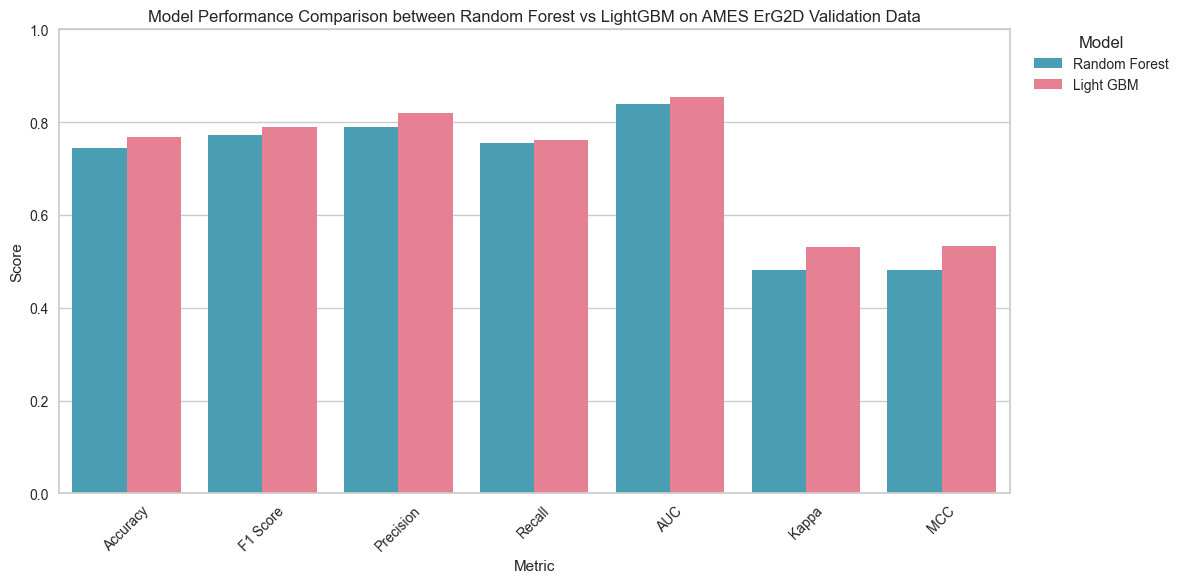

In [93]:
######################################## Compare Random Forest Model  vs LightGBM Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[bestGrid_rf, bestGrid_lgbm], 
                                  model_names=["Random Forest", "Light GBM"],
                                  plot_title="Model Performance Comparison between Random Forest vs LightGBM on AMES ErG2D Validation Data")

Metric  Random Forest  Light GBM
0   Accuracy       0.788462   0.788462
1   F1 Score       0.802817   0.803069
2  Precision       0.820681   0.819843
3     Recall       0.785714   0.786967
4        AUC       0.861360   0.862633
5      Kappa       0.574902   0.574789
6        MCC       0.575536   0.575351

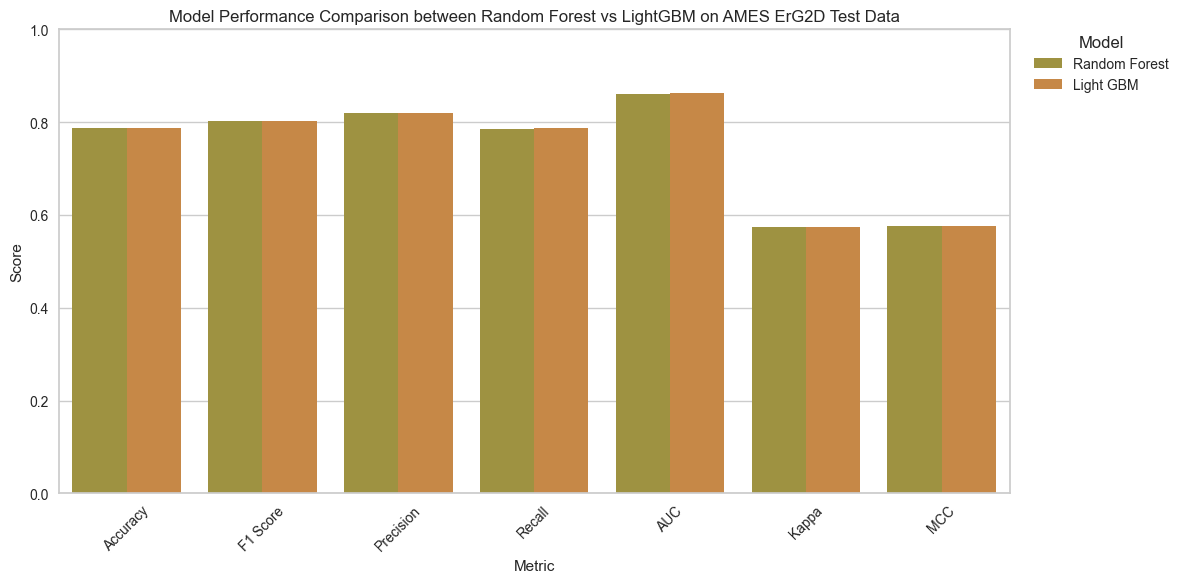

In [90]:
######################################## Compare Random Forest Model  vs LightGBM Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[bestGrid_rf, bestGrid_lgbm], 
                                  model_names=["Random Forest", "Light GBM"], 
                                  dataset="test",
                                  plot_title="Model Performance Comparison between Random Forest vs LightGBM on AMES ErG2D Test Data")

In [94]:
######################################## Save Model  ########################################
trainer.save_model(model = bestGrid_lgbm, dataset_name=dataset, featurizer_id=model_id)
trainer.save_model(model= bestGrid_rf, dataset_name=dataset, featurizer_id=model_id)

💾 Model saved to: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/models/ames/ames_eos5guo_lgbmclassifier.pkl
💾 Model saved to: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/models/ames/ames_eos5guo_randomforestclassifier.pkl


______

## ➕ Stretch Tasks

In [100]:
model_id = "eos4wt0"

In [101]:
######################################## Initialize the preprocessor ########################################
preprocessor = ModelPreprocessor(dataset_name=dataset, model_id=model_id)

2025-04-06 13:44:27,989 - INFO - 🚦 Auto-featurise mode is ON
2025-04-06 13:44:27,990 - INFO - 📂 Checking for featurized files in: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits
2025-04-06 13:44:27,990 - INFO - ✅ All featurized files found. Skipping featurisation.


In [102]:
######################################## Load and split the featurized data ########################################
X_train, y_train, X_valid, y_valid, X_test, y_test = preprocessor.preprocess()

2025-04-06 13:44:30,301 - INFO - 📄 Loading featurized split: train_eos4wt0_features.csv
2025-04-06 13:44:30,687 - INFO - 📄 Loading featurized split: valid_eos4wt0_features.csv
2025-04-06 13:44:30,757 - INFO - 📄 Loading featurized split: test_eos4wt0_features.csv
2025-04-06 13:44:30,902 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_train because: (dtype=object)
2025-04-06 13:44:30,915 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_valid because: (dtype=object)
2025-04-06 13:44:30,918 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_test because: (dtype=object)
2025-04-06 13:44:30,921 - INFO - ✅ Preprocessing Complete

2025-04-06 13:44:30,922 - INFO - 📊 Dataset Summary:
2025-04-06 13:44:30,922 - INFO -    • X_train: (5094, 2048) =====> y_train: (5094,)
2025-04-06 13:44:30,923 - INFO -    • X_valid: (728, 2048) =====> y_valid: (728,)
2025-04-06 13:44:30,924 - INFO -    • X_test:  (1456, 2048) =====> y_test:  (1456,)

2025-04-06 13:44:30,924 - INFO - 🏷️ Target Distribut

In [103]:
######################################## Initialize trainer ########################################
trainer = ModelTrainer(X_train, y_train, X_valid, y_valid, X_test, y_test, experiment_name=dataset)

______

### **2. 🧭 Model Exploration with PyCaret** ###

In [104]:
######################################## Run PyCaret AutoML ########################################
trainer.run_pycaret()

⚙️ Initializing PyCaret...


⚖️ Comparing models...


✅ Best model selected: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [105]:
######################################## View PyCaret Leaderboard ########################################
trainer.log_results()

📋 PyCaret Leaderboard:


Model  Accuracy     AUC  Recall      F1  \
et                 Extra Trees Classifier    0.7910  0.8639  0.8141  0.8083   
rf               Random Forest Classifier    0.7801  0.8573  0.8125  0.8000   
lightgbm  Light Gradient Boosting Machine    0.7722  0.8475  0.7876  0.7890   
xgboost         Extreme Gradient Boosting    0.7686  0.8480  0.7830  0.7854   
lr                    Logistic Regression    0.7492  0.8186  0.7716  0.7690   

           Kappa  TT (Sec)  
et        0.5786     0.629  
rf        0.5558     0.438  
lightgbm  0.5415     0.528  
xgboost   0.5343     0.438  
lr        0.4947     0.624

_____

### **3. 🛠️ Hyperparameter Tuning with PyCaret** ###

##### 1️⃣  Top ranked model selected by PyCaret (Extra Trees Classifier 🌲)

In [106]:
######################################## Tune Extra Trees Classifier (et) ########################################
pyC_tuned_et = trainer.tune_model_with_pycaret(ExtraTreesClassifier(), n_iter=200)

🛠️ Tuning ExtraTreesClassifier...


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##### 2️⃣  Second ranked model selected by PyCaret (Random Forest 🌳)

In [107]:
######################################## Tune Random Forest ########################################
pyC_tuned_rf = trainer.tune_model_with_pycaret(RandomForestClassifier(), n_iter=200)

🛠️ Tuning RandomForestClassifier...


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##### 3️⃣ Third Ranked model selected by PyCaret (Light Gradient Boosting Machine 🌀)

In [108]:
######################################## Tune Light Gradient Boosting Machine ########################################
pyC_tuned_lgbm = trainer.tune_model_with_pycaret(LGBMClassifier(), n_iter=200)

🛠️ Tuning LGBMClassifier...


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


##### 4️⃣  Fourth Ranked model selected by PyCaret (Extreme Gradient Boosting 💥)

In [109]:
######################################## Tune Extreme Gradient Boosting (xgboost) ########################################
pyC_tuned_xgb = trainer.tune_model_with_pycaret(XGBClassifier(), n_iter=200)

🛠️ Tuning XGBClassifier...


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


##### 5️⃣   Fifth Ranked model selected by PyCaret (Logistic Regression 📈)

In [110]:
######################################## Tune Logistic Regression (lr) ########################################
pyC_tuned_lr = trainer.tune_model_with_pycaret(LogisticRegression(max_iter=1000), n_iter=200)

🛠️ Tuning LogisticRegression...


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


Metric  ET Classifier (PyCaret)  Random Forest (PyCaret)  \
0   Accuracy                 0.802198                 0.799451   
1   F1 Score                 0.825243                 0.825776   
2  Precision                 0.835381                 0.821853   
3     Recall                 0.815348                 0.829736   
4        AUC                 0.881071                 0.878376   
5      Kappa                 0.597472                 0.589542   
6        MCC                 0.597705                 0.589580   

   LightGBM (PyCaret)  XGBoost (PyCaret)  Linear Regression (PyCaret)  
0            0.777473           0.788462                     0.760989  
1            0.805755           0.821759                     0.783582  
2            0.805755           0.794183                     0.813953  
3            0.805755           0.851319                     0.755396  
4            0.853463           0.857287                     0.833198  
5            0.545305           0.562394                     0.517539  
6            0.545305           0.564449                     0.519339

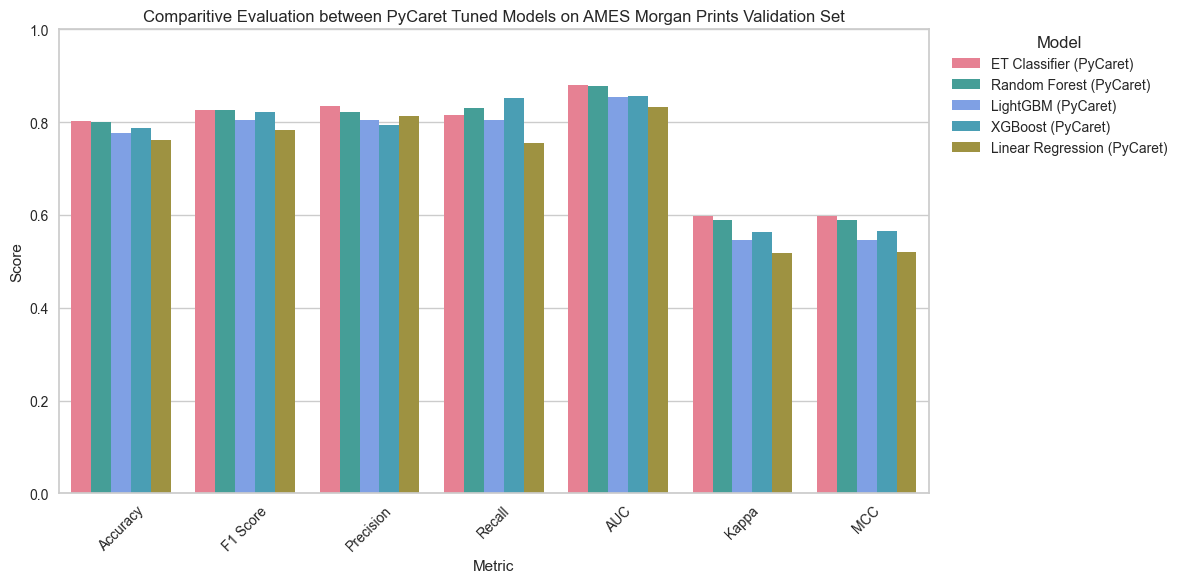

In [111]:
######################################## Compare Pycaret Best Models Evaluation ########################################
trainer.compare_models_on_metrics(models=[pyC_tuned_et, pyC_tuned_rf, pyC_tuned_lgbm, pyC_tuned_xgb, pyC_tuned_lr], 
                                  model_names=["ET Classifier (PyCaret)", "Random Forest (PyCaret)", "LightGBM (PyCaret)", "XGBoost (PyCaret)", "Linear Regression (PyCaret)"],
                                  plot_title="Comparitive Evaluation between PyCaret Tuned Models on AMES Morgan Prints Validation Set")

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


Metric  ET Classifier (PyCaret)  Random Forest (PyCaret)  \
0   Accuracy                 0.811813                 0.798764   
1   F1 Score                 0.828750                 0.815839   
2  Precision                 0.826683                 0.818411   
3     Recall                 0.830827                 0.813283   
4        AUC                 0.884937                 0.875419   
5      Kappa                 0.619911                 0.594042   
6        MCC                 0.619921                 0.594057   

   LightGBM (PyCaret)  XGBoost (PyCaret)  Linear Regression (PyCaret)  
0            0.793269           0.782280                     0.770604  
1            0.812227           0.809610                     0.785347  
2            0.808696           0.777393                     0.806069  
3            0.815789           0.844612                     0.765664  
4            0.876656           0.863278                     0.839944  
5            0.582290           0.556417                     0.539384  
6            0.582318           0.559029                     0.540206

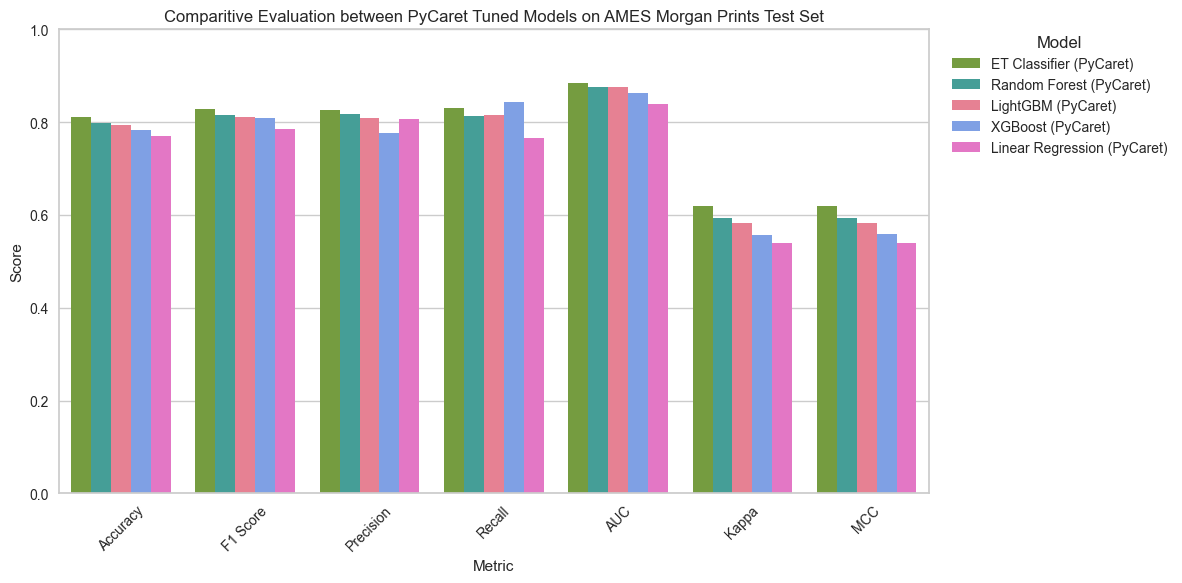

In [115]:
######################################## Compare Pycaret Best Models Evaluation ########################################
trainer.compare_models_on_metrics(models=[pyC_tuned_et, pyC_tuned_rf, pyC_tuned_lgbm, pyC_tuned_xgb, pyC_tuned_lr], 
                                  model_names=["ET Classifier (PyCaret)", "Random Forest (PyCaret)", "LightGBM (PyCaret)", "XGBoost (PyCaret)", "Linear Regression (PyCaret)"],
                                  dataset="test",
                                  plot_title="Comparitive Evaluation between PyCaret Tuned Models on AMES Morgan Prints Test Set")

______

### **4. 🔧 Hyperparameter Tuning with GridSearchCV** ###

##### 1️⃣ Extra Trees Classifier 🌲

In [116]:
######################################## Define parameter grid for Extra Trees Classifier tuning ########################################

et_param_grid = {
    "n_estimators": list(range(50, 201, 50)),
    "max_depth": [None] + list(range(5, 31, 5)),
    "min_samples_split": list(range(2, 5)),
    "min_samples_leaf": list(range(1, 4)),
    "max_features": ["sqrt", "log2"]
}

In [117]:
######################################## Initialize the model ########################################
et_base = ExtraTreesClassifier(random_state=42)

In [118]:
# Setup GridSearchCV
et_grid = GridSearchCV(
    estimator=et_base,
    param_grid=et_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [119]:
# Fit GridSearchCV on training data
et_grid.fit(X_train, y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            monotonic_cst=None,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [120]:
######################################## Best GridCV Parameters for ET ########################################
print(f"✨ Best GridCV Parameters (Extra Trees):\n {et_grid.best_params_}")

✨ Best GridCV Parameters (Extra Trees):
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


In [121]:
########################################  Retrieve best params and reinstantiate clean model ########################################
bestGrid_et = ExtraTreesClassifier(**et_grid.best_params_, random_state=42)

In [122]:
######################################## Train model with best GridSearchCV params ########################################
trained_et = trainer.train_selected_model(bestGrid_et)

🔧 Training selected model: ExtraTreesClassifier


In [123]:
######################################## Evaluate model on validation set ########################################
trainer.evaluate_model(trained_et)

📊 Evaluation Metrics on Validation Set:
Accuracy: 0.8173
AUC: 0.8898
Recall: 0.8321
Precision: 0.8463
F1 Score: 0.8392
Kappa: 0.6278
MCC: 0.6279
Time taken (seconds): 0.08


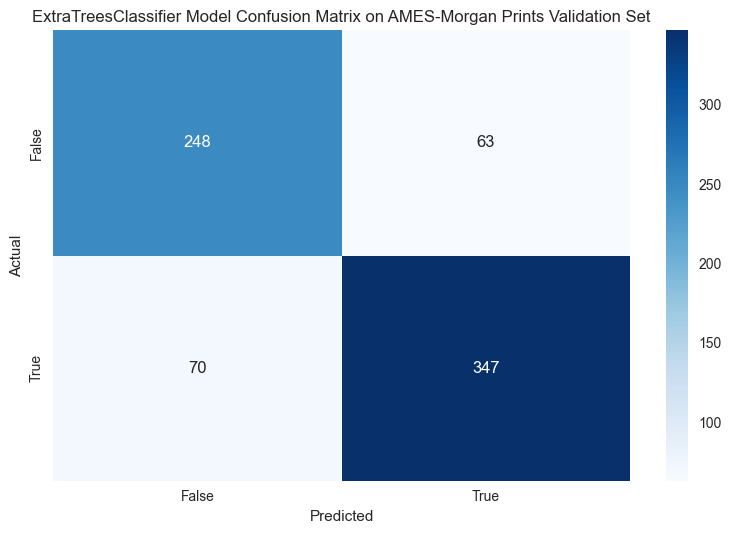

In [124]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_et, plot_title= "ExtraTreesClassifier Model Confusion Matrix on AMES-Morgan Prints Validation Set")

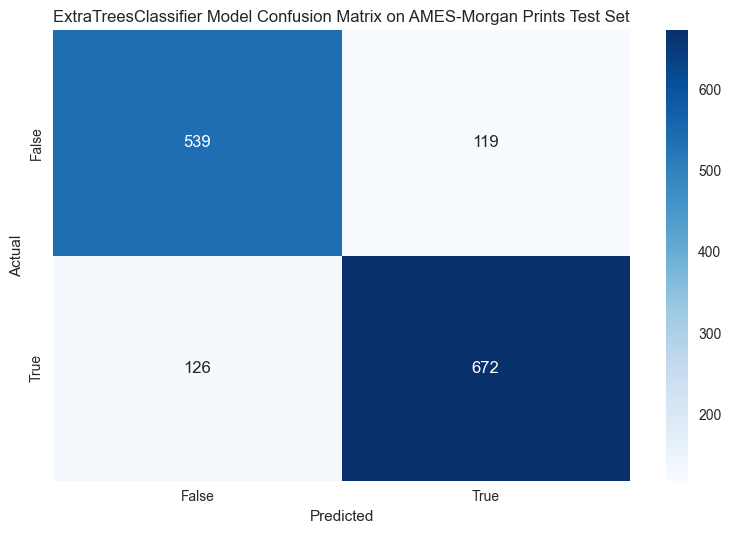

In [125]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_et, 
                              dataset="test",
                              plot_title= "ExtraTreesClassifier Model Confusion Matrix on AMES-Morgan Prints Test Set")

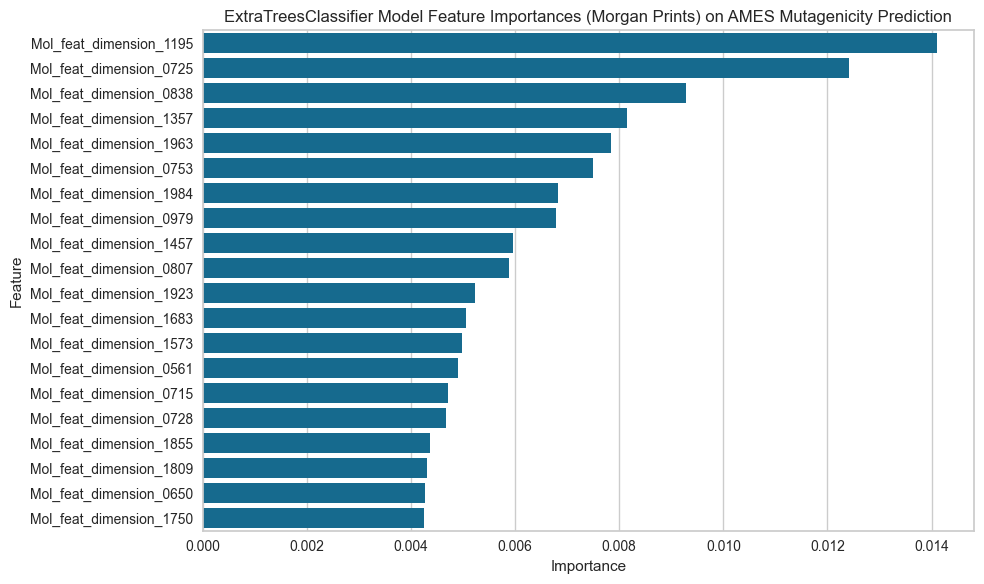

In [126]:
######################################## Plot feature importances (for tree-based models) ########################################
trainer.plot_feature_importance(plot_title="ExtraTreesClassifier Model Feature Importances (Morgan Prints) on AMES Mutagenicity Prediction")

Metric  Extra Trees (PyCaret)  Extra Trees (GridCV)
0   Accuracy               0.802198              0.817308
1   F1 Score               0.825243              0.839178
2  Precision               0.835381              0.846341
3     Recall               0.815348              0.832134
4        AUC               0.881071              0.889796
5      Kappa               0.597472              0.627766
6        MCC               0.597705              0.627887

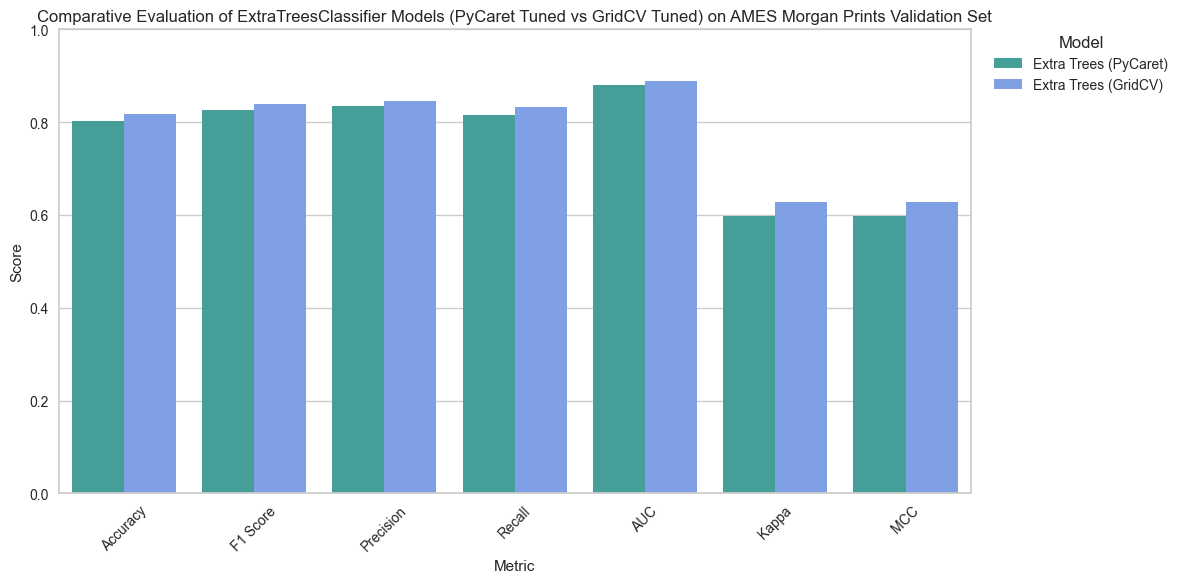

In [ ]:
######################################## Compare Pycaret ET Models  vs GridCV ET Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_et, bestGrid_et], 
                                  model_names=["Extra Trees  (PyCaret)", "Extra Trees (GridCV)"],
                                  plot_title="Comparative Evaluation of ExtraTreesClassifier Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Validation Set")

Metric  Extra Trees (PyCaret)  Extra Trees (GridCV)
0   Accuracy               0.811813              0.831731
1   F1 Score               0.828750              0.845815
2  Precision               0.826683              0.849558
3     Recall               0.830827              0.842105
4        AUC               0.884937              0.896976
5      Kappa               0.619911              0.660638
6        MCC               0.619921              0.660669

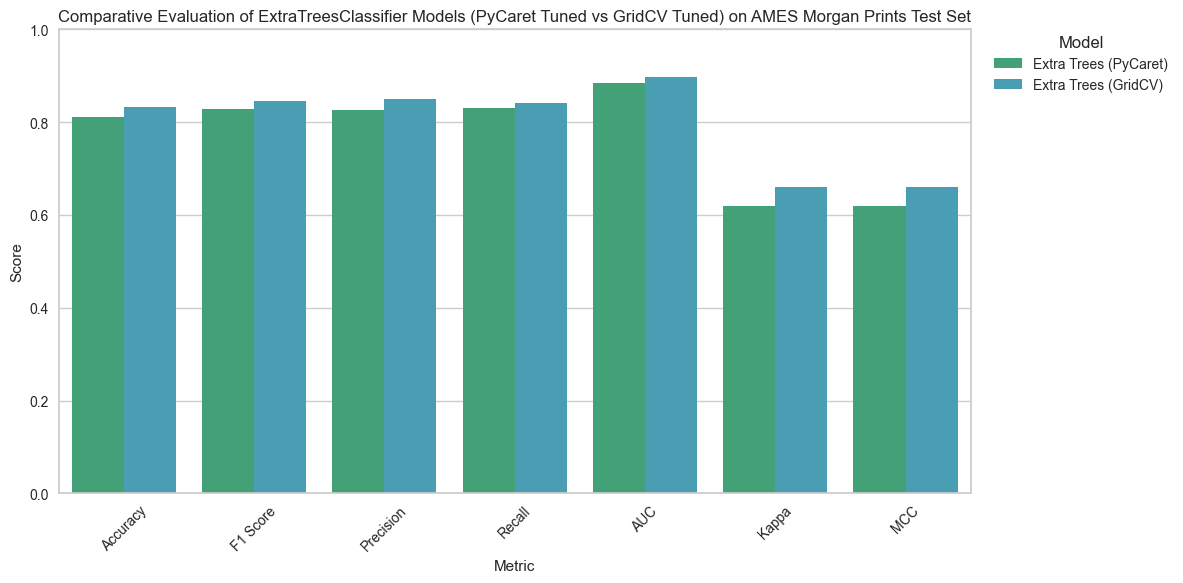

In [128]:
######################################## Compare Pycaret ET Models  vs GridCV ET Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_et, bestGrid_et], 
                                  model_names=["Extra Trees (PyCaret)", "Extra Trees (GridCV)"], 
                                  dataset="test",
                                  plot_title="Comparative Evaluation of ExtraTreesClassifier Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Test Set")

______

##### 2️⃣ GridSearchCV: Random Forest 🌳

In [134]:
######################################## Define parameter grid for Random Forest tuning ########################################

rf_param_grid = {
    "n_estimators": list(range(200, 401, 50)),
    "max_depth": [None] + list(range(5, 31, 5)),
    "min_samples_split": list(range(2, 5)),
    "min_samples_leaf": list(range(1, 4)),
    "max_features": ["sqrt", "log2"]
}

In [135]:
######################################## Initialize the model ########################################
rf_base = RandomForestClassifier(random_state=42)

In [136]:
# Setup GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [137]:
# Fit GridSearchCV on training data
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 250, 300, 350, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [138]:
######################################## Best GridCV Parameters for RF ########################################
print(f"✨ Best GridCV Parameters (Random Forest):\n {rf_grid.best_params_}")

✨ Best GridCV Parameters (Random Forest):
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [139]:
########################################  Retrieve best params and reinstantiate clean model ########################################
bestGrid_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)

In [140]:
######################################## Train model with best GridSearchCV params ########################################
trained_rf = trainer.train_selected_model(bestGrid_rf)

🔧 Training selected model: RandomForestClassifier


In [141]:
######################################## Evaluate model on validation set ########################################
trainer.evaluate_model(trained_rf)

📊 Evaluation Metrics on Validation Set:
Accuracy: 0.8104
AUC: 0.8879
Recall: 0.8273
Precision: 0.8394
F1 Score: 0.8333
Kappa: 0.6136
MCC: 0.6137
Time taken (seconds): 0.12


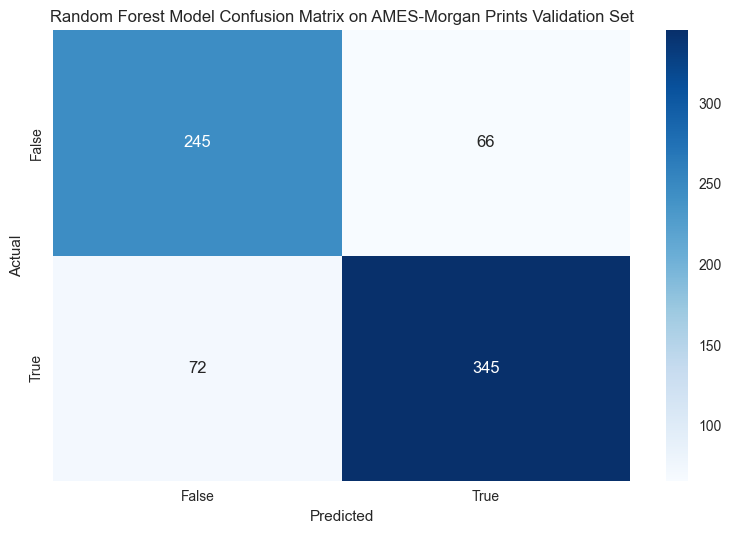

In [142]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_rf, plot_title= "Random Forest Model Confusion Matrix on AMES-Morgan Prints Validation Set")

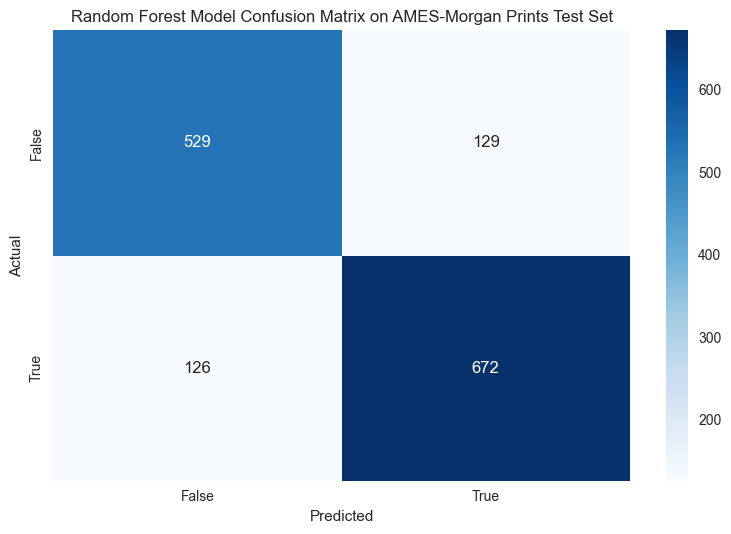

In [143]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_rf, 
                              dataset="test",
                              plot_title= "Random Forest Model Confusion Matrix on AMES-Morgan Prints Test Set")

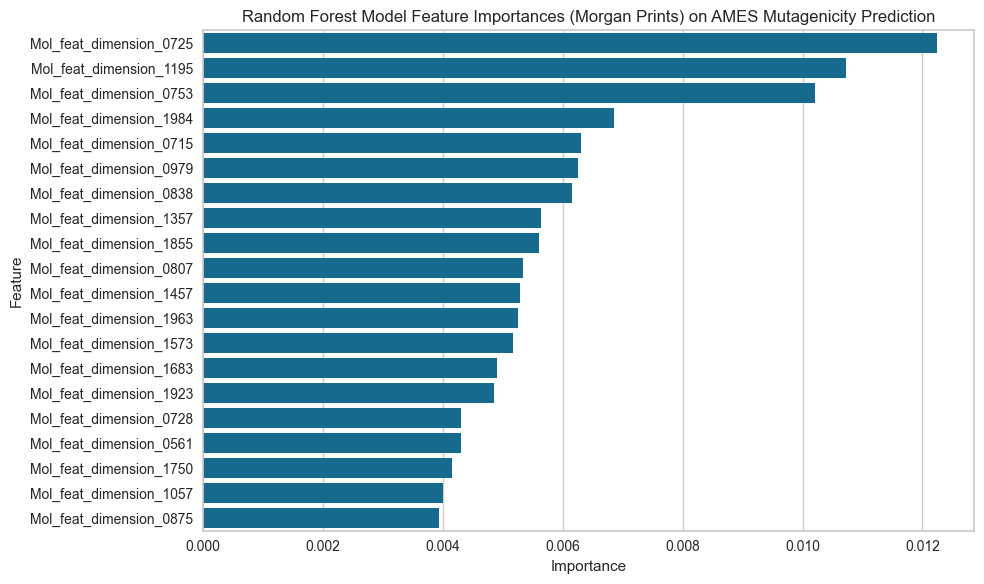

In [144]:
######################################## Plot feature importances ########################################
trainer.plot_feature_importance(plot_title="Random Forest Model Feature Importances (Morgan Prints) on AMES Mutagenicity Prediction")

Metric  Random Forest (PyCaret)  Random Forest (GridCV)
0   Accuracy                 0.799451                0.810440
1   F1 Score                 0.825776                0.833333
2  Precision                 0.821853                0.839416
3     Recall                 0.829736                0.827338
4        AUC                 0.878376                0.887868
5      Kappa                 0.589542                0.613615
6        MCC                 0.589580                0.613701

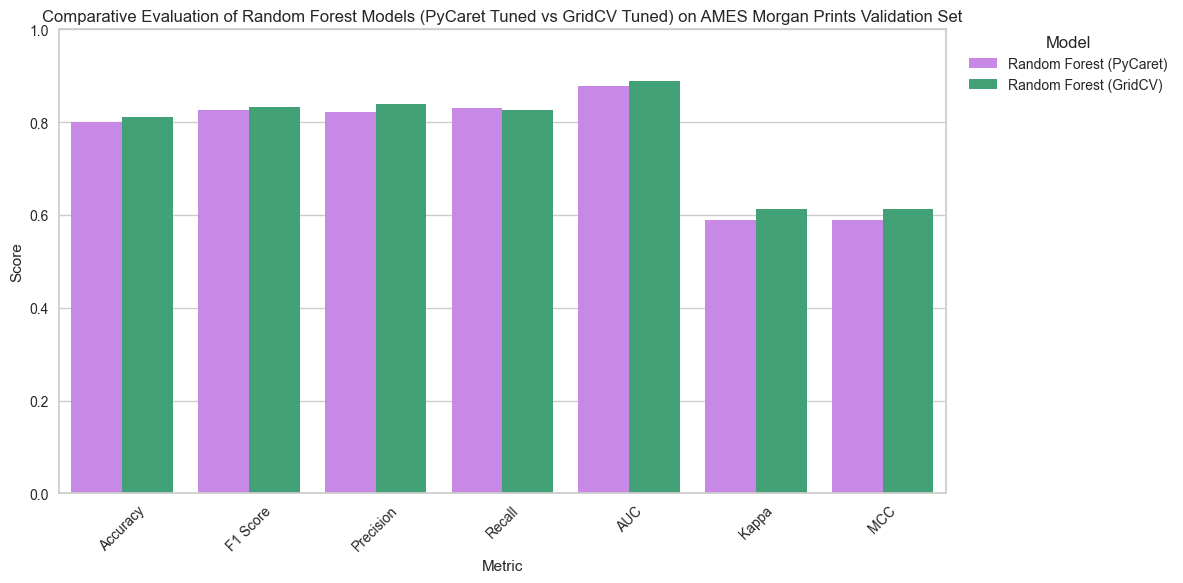

In [145]:
######################################## Compare Pycaret RF Models  vs GridCV RF Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_rf, bestGrid_rf], 
                                  model_names=["Random Forest (PyCaret)", "Random Forest (GridCV)"],
                                  plot_title="Comparative Evaluation of Random Forest Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Validation Set")

Metric  PyCaret - Random Forest  GridCV - Random Forest
0   Accuracy                 0.798764                0.824863
1   F1 Score                 0.815839                0.840525
2  Precision                 0.818411                0.838951
3     Recall                 0.813283                0.842105
4        AUC                 0.875419                0.892930
5      Kappa                 0.594042                0.646315
6        MCC                 0.594057                0.646321

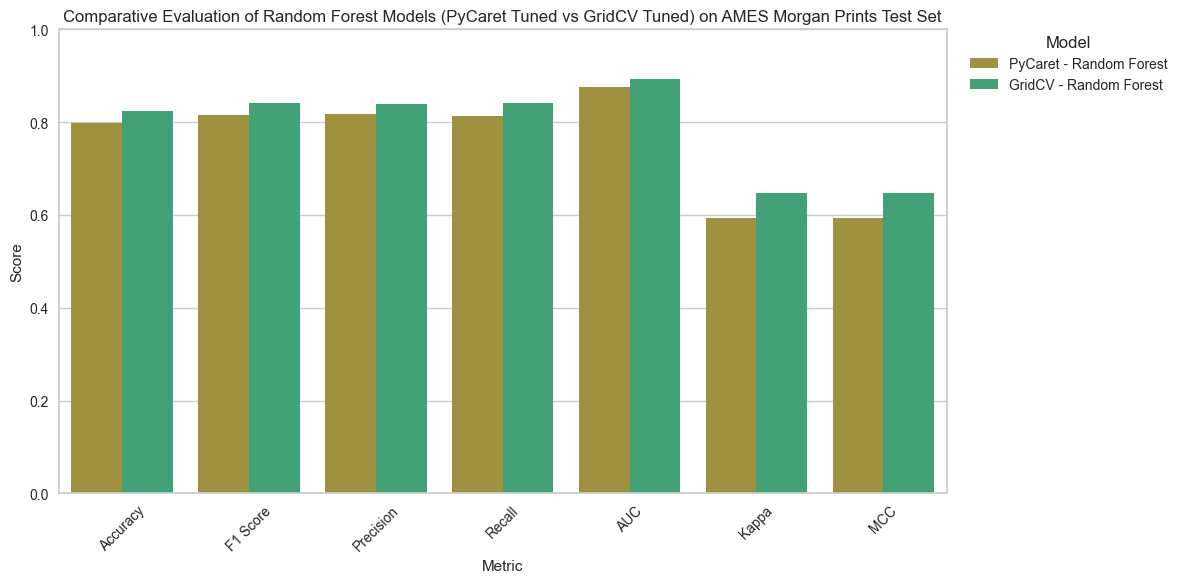

In [149]:
######################################## Compare Pycaret RF Models  vs GridCV RF Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_rf, bestGrid_rf], 
                                  model_names=["PyCaret - Random Forest", "GridCV - Random Forest"], 
                                  dataset="test",
                                  plot_title="Comparative Evaluation of Random Forest Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Test Set")

______

##### 3️⃣ GridSearchCV: Light Gradient Boosting Machine 🌀

In [155]:
######################################## Define LightGBM Param Grid ########################################

lgbm_param_grid = {
    "n_estimators": [200, 250, 300],
    "max_depth": [None, 10, 20],
    "learning_rate": [0.05, 0.1],
    "min_child_samples": [10],              
    "subsample": [0.8, 1.0],                      
    "colsample_bytree": [0.8, 1.0],               
}

In [156]:
######################################## Setup GridSearchCV for LightGBM ########################################
lgbm_base = LGBMClassifier(random_state=42)

In [157]:
######################################## Setup GridSearchCV ########################################
lgbm_grid = GridSearchCV(
    estimator=lgbm_base,
    param_grid=lgbm_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [158]:
######################################## Run GridSearch for LightGBM ########################################
lgbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2208, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Number of positive: 2207, number of negative: 1868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.222178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4094
[LightGBM] [Info] Number of data points in the train set: 4075, number of used features: 2047
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541595 -> initscore=0.166766
[LightGBM] [Info]

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=None, num_leaves=31,
                                      objective=None, random_state=42,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1],
                         'max_depth': [None, 10, 20], 'min_child_samples': [10],
                         'n_estimators': [200, 250, 300],
                         'subsample': [0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [159]:
######################################## Get Best LightGBM Params ########################################
print("✨ Best GridCV Parameters (LightGBM):", lgbm_grid.best_params_)

✨ Best GridCV Parameters (LightGBM): {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_samples': 10, 'n_estimators': 250, 'subsample': 0.8}


In [160]:
######################################## Extract the best LightGBM model found during GridSearchCV ########################################
bestGrid_lgbm = lgbm_grid.best_estimator_

In [161]:
######################################## Train Tuned LightGBM ########################################
trained_lgbm = trainer.train_selected_model(bestGrid_lgbm)

🔧 Training selected model: LGBMClassifier
[LightGBM] [Info] Number of positive: 2759, number of negative: 2335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4096
[LightGBM] [Info] Number of data points in the train set: 5094, number of used features: 2048
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541618 -> initscore=0.166856
[LightGBM] [Info] Start training from score 0.166856


In [162]:
######################################## Evaluate Tuned LightGBM ########################################
trainer.evaluate_model(trained_lgbm)

📊 Evaluation Metrics on Validation Set:
Accuracy: 0.7940
AUC: 0.8691
Recall: 0.8106
Precision: 0.8264
F1 Score: 0.8184
Kappa: 0.5804
MCC: 0.5805
Time taken (seconds): 0.05


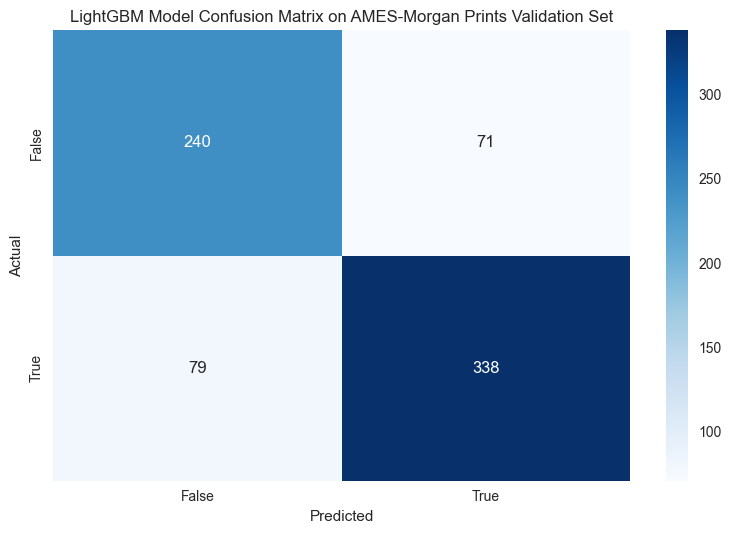

In [163]:
######################################## LightGBM Confusion Matrix ########################################
trainer.plot_confusion_matrix(trained_lgbm, plot_title= "LightGBM Model Confusion Matrix on AMES-Morgan Prints Validation Set")

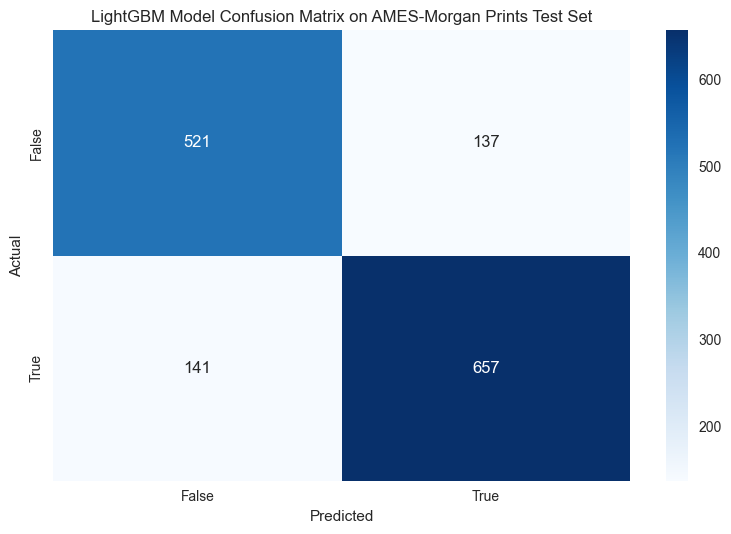

In [164]:
######################################## LightGBM Confusion Matrix ########################################
trainer.plot_confusion_matrix(trained_lgbm, 
                              dataset="test",
                              plot_title= "LightGBM Model Confusion Matrix on AMES-Morgan Prints Test Set")

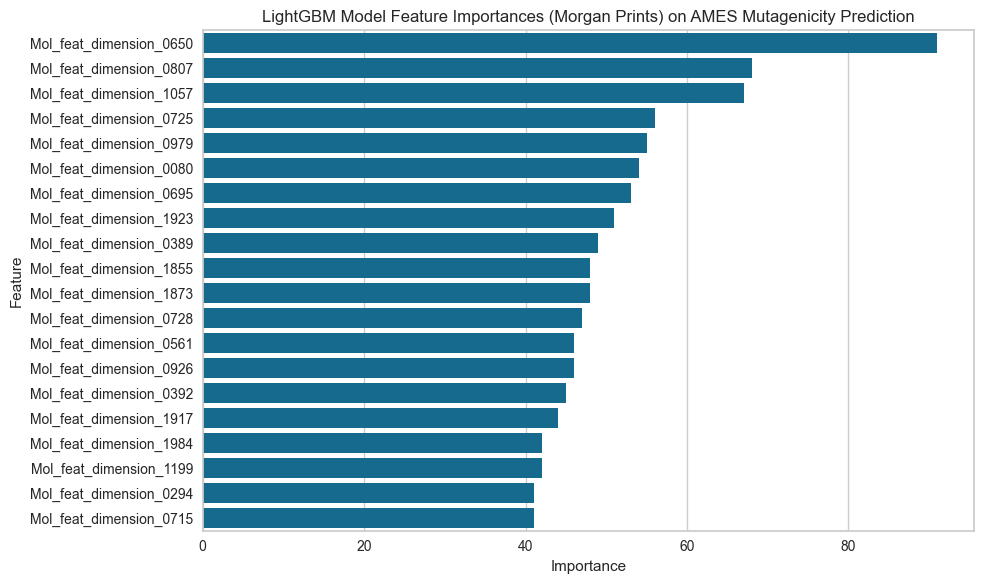

In [166]:
######################################## Feature Importance Plot for LightGBM ########################################
trainer.plot_feature_importance(plot_title="LightGBM Model Feature Importances (Morgan Prints) on AMES Mutagenicity Prediction")

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


Metric  LightGBM (PyCaret)  LightGBM (GridCV)
0   Accuracy            0.777473           0.793956
1   F1 Score            0.805755           0.818402
2  Precision            0.805755           0.826406
3     Recall            0.805755           0.810552
4        AUC            0.853463           0.869069
5      Kappa            0.545305           0.580358
6        MCC            0.545305           0.580504

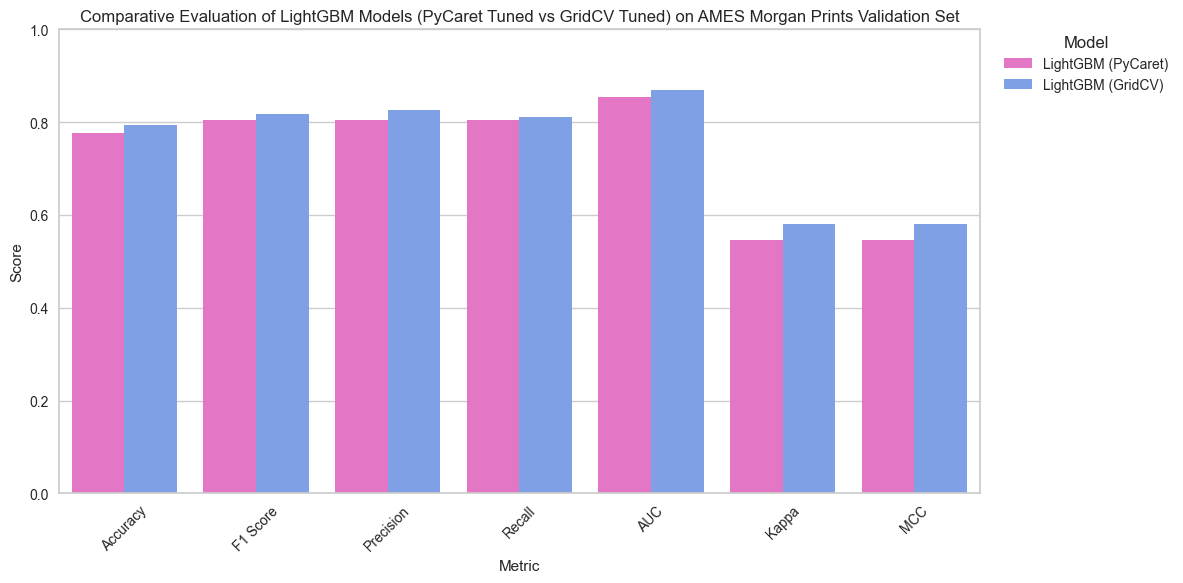

In [167]:
######################################## Compare Pycaret LightGBM Models  vs GridCV LightGBM Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_lgbm, bestGrid_lgbm], 
                                  model_names=["LightGBM (PyCaret)", "LightGBM (GridCV)"],
                                  plot_title="Comparative Evaluation of LightGBM Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Validation Set")

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


Metric  LightGBM (PyCaret)  LightGBM (GridCV)
0   Accuracy            0.793269           0.809066
1   F1 Score            0.812227           0.825377
2  Precision            0.808696           0.827456
3     Recall            0.815789           0.823308
4        AUC            0.876656           0.886614
5      Kappa            0.582290           0.614774
6        MCC            0.582318           0.614783

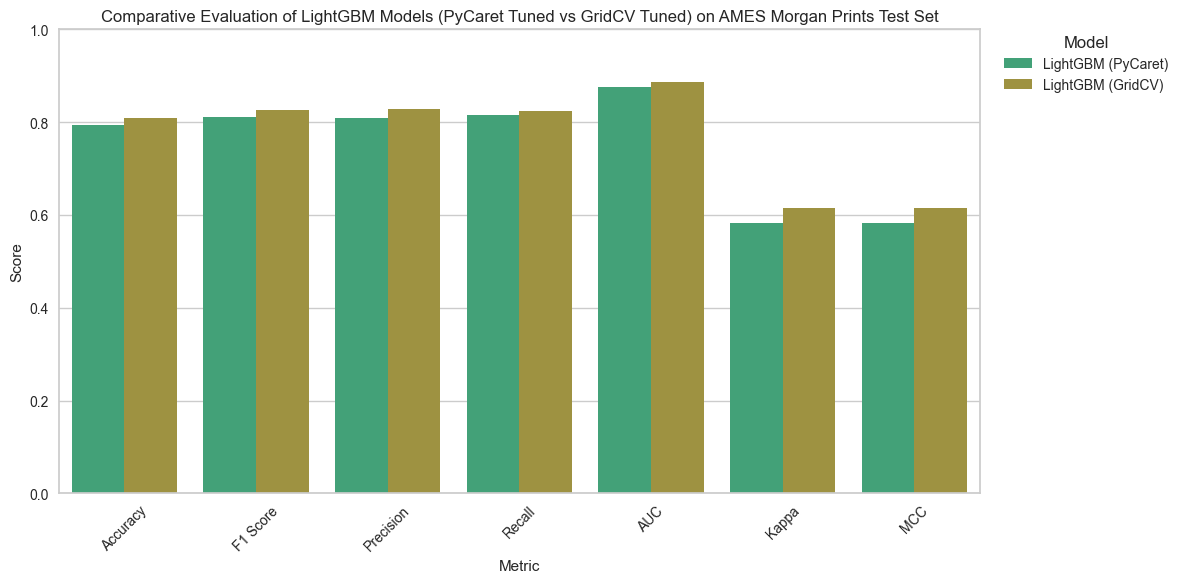

In [168]:
######################################## Compare Pycaret LightGBM Models  vs GridCV LightGBM Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_lgbm, bestGrid_lgbm], 
                                  model_names=["LightGBM (PyCaret)", "LightGBM (GridCV)"], 
                                  dataset="test",
                                  plot_title="Comparative Evaluation of LightGBM Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Test Set")

_______

##### 4️⃣ GridSearchCV: Extreme Gradient Boosting Machine 💥

In [186]:
######################################## Define parameter grid for XGBoost Classifier tuning ########################################

xgb_param_grid = {
    "n_estimators": [300, 350, 400],
    "max_depth": [5, 7, 9],
    "learning_rate": [0.1, 0.2, 0.3],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

In [187]:
######################################## Initialize the model ########################################
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

In [188]:
# Setup GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=xgb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [189]:
# Fit GridSearchCV on training data
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:57:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:57:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:57:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributi

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     intera...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 7, 9],
                         'n_estimators': [300, 350, 400],
                         'subsample': [0.6, 0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [190]:
######################################## Best GridCV Parameters for XGB ########################################
print(f"✨ Best GridCV Parameters (XGBoost):\n {xgb_grid.best_params_}")

✨ Best GridCV Parameters (XGBoost):
 {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 350, 'subsample': 0.8}


In [191]:
######################################## Retrieve best params and reinstantiate clean model ########################################
bestGrid_xgb = XGBClassifier(**xgb_grid.best_params_, use_label_encoder=False, eval_metric="logloss", random_state=42)

In [192]:
######################################## Train model with best GridSearchCV params ########################################
trained_xgb = trainer.train_selected_model(bestGrid_xgb)

🔧 Training selected model: XGBClassifier


In [193]:
######################################## Evaluate model on validation set ########################################
trainer.evaluate_model(trained_xgb)

📊 Evaluation Metrics on Validation Set:
Accuracy: 0.8063
AUC: 0.8805
Recall: 0.8177
Precision: 0.8399
F1 Score: 0.8287
Kappa: 0.6060
MCC: 0.6063
Time taken (seconds): 0.18


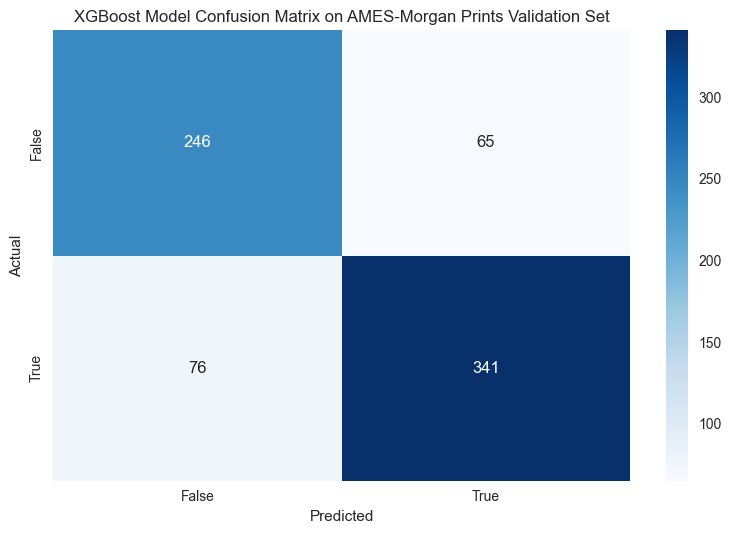

In [194]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_xgb, 
                              plot_title= "XGBoost Model Confusion Matrix on AMES-Morgan Prints Validation Set")

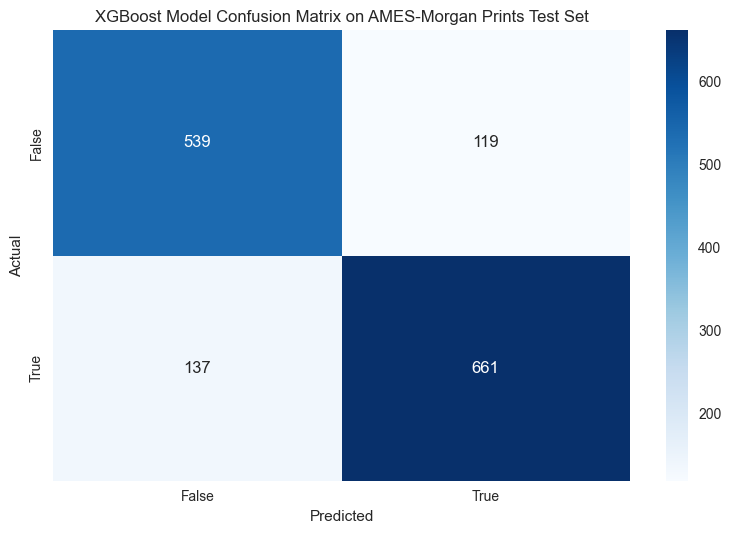

In [195]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_xgb, 
                              dataset="test",
                              plot_title= "XGBoost Model Confusion Matrix on AMES-Morgan Prints Test Set")

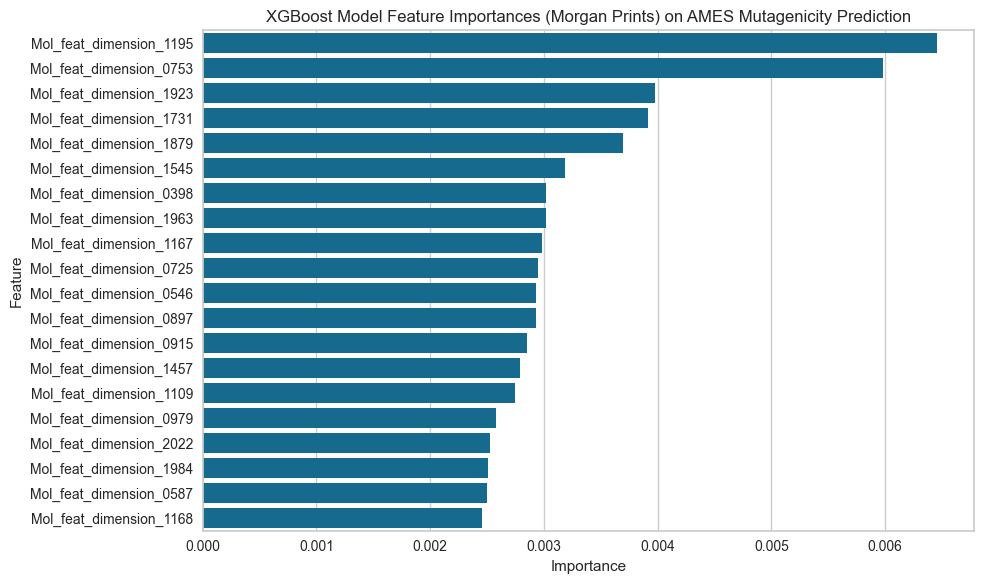

In [197]:
######################################## Plot feature importances ########################################
trainer.plot_feature_importance(plot_title="XGBoost Model Feature Importances (Morgan Prints) on AMES Mutagenicity Prediction")

Metric  XGBoost (PyCaret)  XGBoost (GridCV)
0   Accuracy           0.788462          0.806319
1   F1 Score           0.821759          0.828676
2  Precision           0.794183          0.839901
3     Recall           0.851319          0.817746
4        AUC           0.857287          0.880489
5      Kappa           0.562394          0.606018
6        MCC           0.564449          0.606305

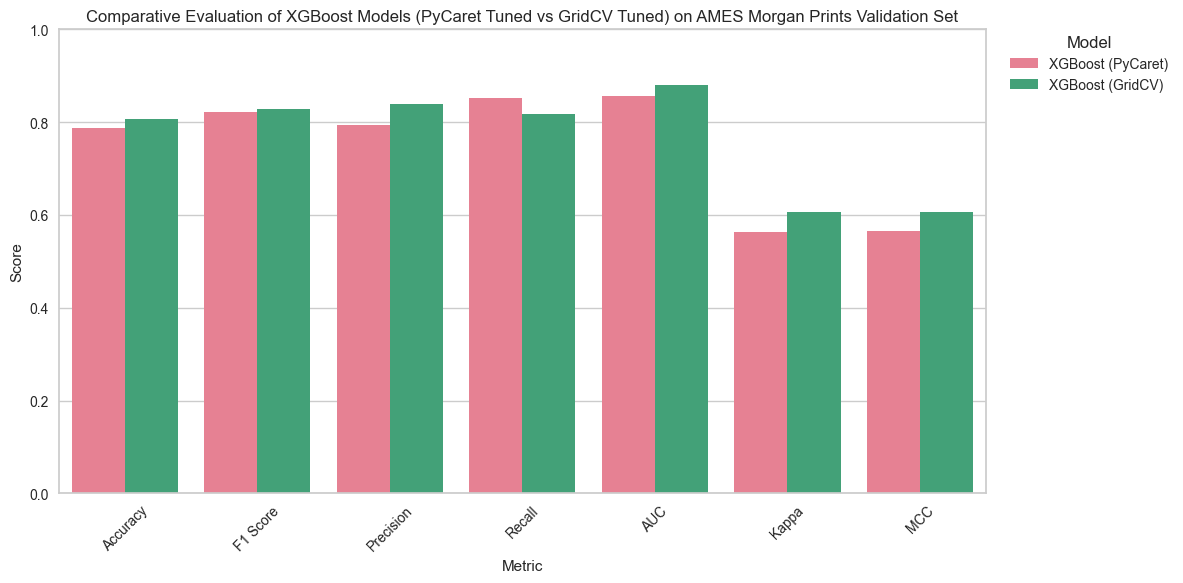

In [198]:
######################################## Compare Pycaret XG Boost Models  vs GridCV XG Boost Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_xgb, bestGrid_xgb], 
                                  model_names=["XGBoost (PyCaret)", "XGBoost (GridCV)"],
                                  plot_title="Comparative Evaluation of XGBoost Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Validation Set")

Metric  XGBoost (PyCaret)  XGBoost (GridCV)
0   Accuracy           0.782280          0.824176
1   F1 Score           0.809610          0.837769
2  Precision           0.777393          0.847436
3     Recall           0.844612          0.828321
4        AUC           0.863278          0.895506
5      Kappa           0.556417          0.645920
6        MCC           0.559029          0.646120

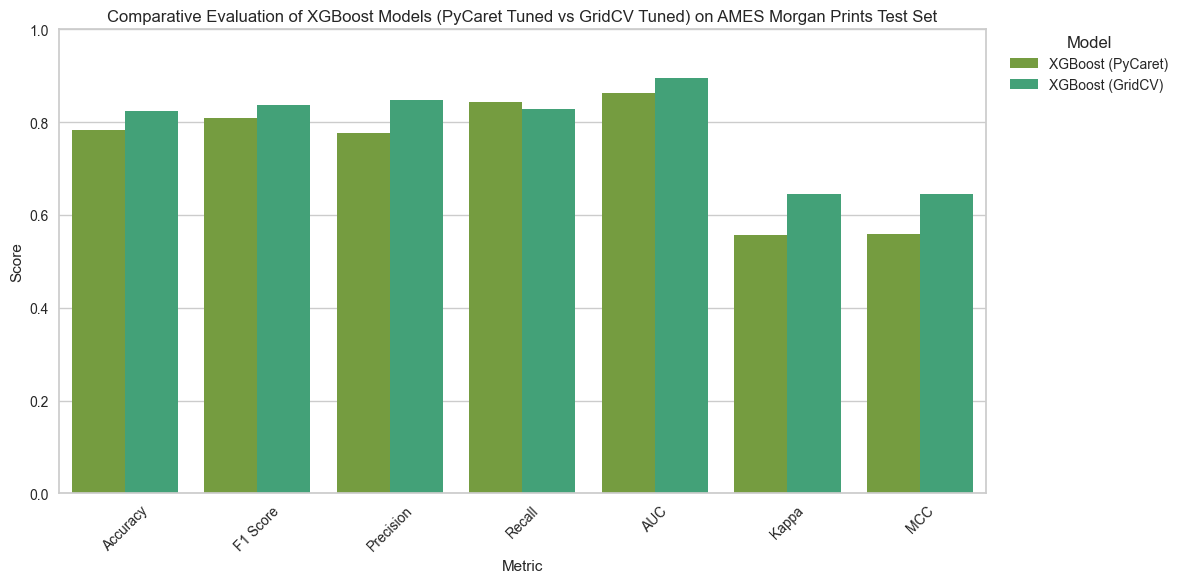

In [199]:
######################################## Compare Pycaret XG Boost Models  vs GridCV XG Boost Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_xgb, bestGrid_xgb], 
                                  model_names=["XGBoost (PyCaret)", "XGBoost (GridCV)"], 
                                  dataset="test",
                                  plot_title="Comparative Evaluation of XGBoost Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Test Set")

##### 5️⃣ GridSearchCV: Logistic Regression 📈

In [200]:
######################################## Define parameter grid for Logistic Regression tuning ########################################
lr_param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["saga"],
    "max_iter": [500, 1000]
}

In [201]:
######################################## Initialize the model ########################################
lr_base = LogisticRegression(random_state=42)

In [202]:
# Setup GridSearchCV
lr_grid = GridSearchCV(
    estimator=lr_base,
    param_grid=lr_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [203]:
# Fit GridSearchCV on training data
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/taiwoadelakin/Documents/Doc/Projects/outr

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [204]:
######################################## Best GridCV Parameters for LR ########################################
print(f"✨ Best GridCV Parameters (Logistic Regression):\n {lr_grid.best_params_}")

✨ Best GridCV Parameters (Logistic Regression):
 {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}


In [205]:
######################################## Retrieve best params and reinstantiate clean model ########################################
bestGrid_lr = LogisticRegression(**lr_grid.best_params_, random_state=42)

In [206]:
######################################## Train model with best GridSearchCV params ########################################
trained_lr = trainer.train_selected_model(bestGrid_lr)

🔧 Training selected model: LogisticRegression


In [207]:
######################################## Evaluate model on validation set ########################################
trainer.evaluate_model(trained_lr)
# trainer.evaluate_model(trained_lr, dataset="test")

📊 Evaluation Metrics on Validation Set:
Accuracy: 0.7830
AUC: 0.8421
Recall: 0.8034
Precision: 0.8151
F1 Score: 0.8092
Kappa: 0.5576
MCC: 0.5577
Time taken (seconds): 0.05


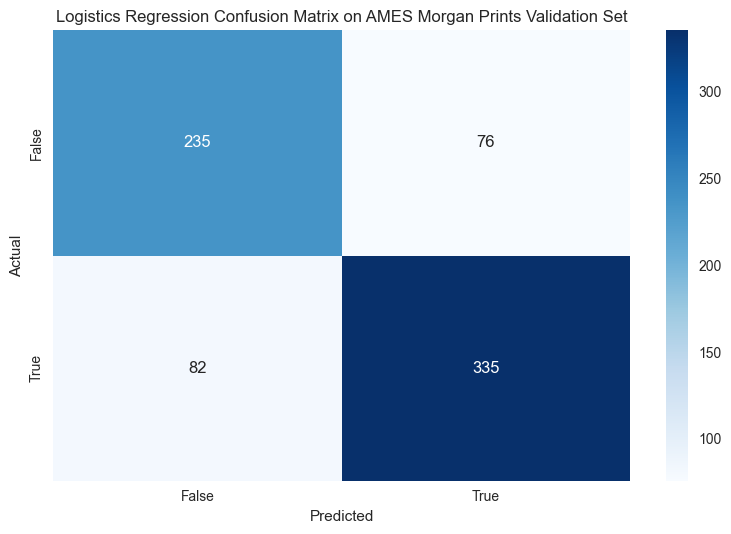

In [208]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_lr, 
                              plot_title= "Logistics Regression Confusion Matrix on AMES Morgan Prints Validation Set")

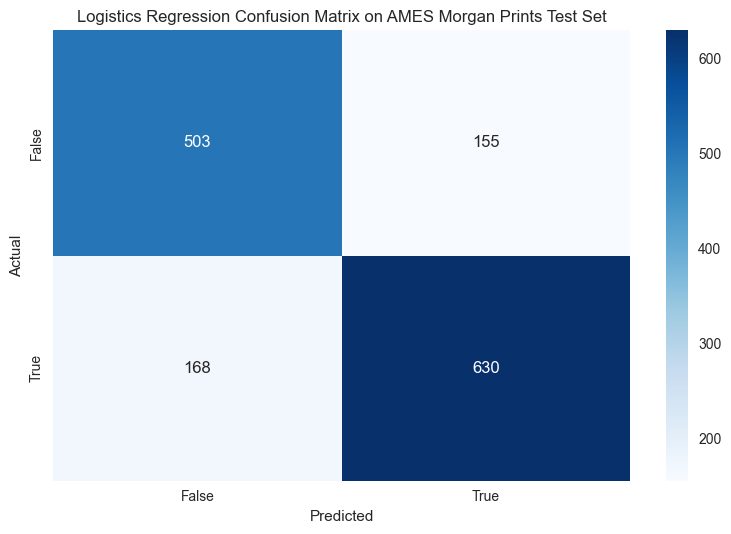

In [209]:
######################################## Plot confusion matrix ########################################
trainer.plot_confusion_matrix(trained_lr, 
                              dataset="test",
                              plot_title= "Logistics Regression Confusion Matrix on AMES Morgan Prints Test Set")

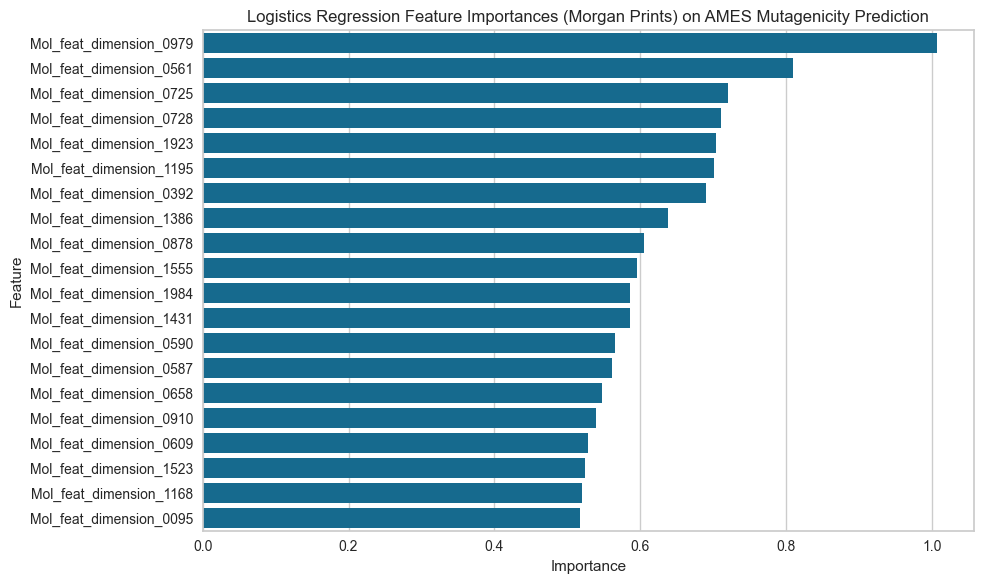

In [210]:
######################################## Plot feature importances ########################################
trainer.plot_feature_importance(plot_title="Logistics Regression Feature Importances (Morgan Prints) on AMES Mutagenicity Prediction")

Metric  Logistic Regression (PyCaret)  Logistic Regression (GridCV)
0   Accuracy                       0.760989                      0.782967
1   F1 Score                       0.783582                      0.809179
2  Precision                       0.813953                      0.815085
3     Recall                       0.755396                      0.803357
4        AUC                       0.833198                      0.842089
5      Kappa                       0.517539                      0.557617
6        MCC                       0.519339                      0.557696

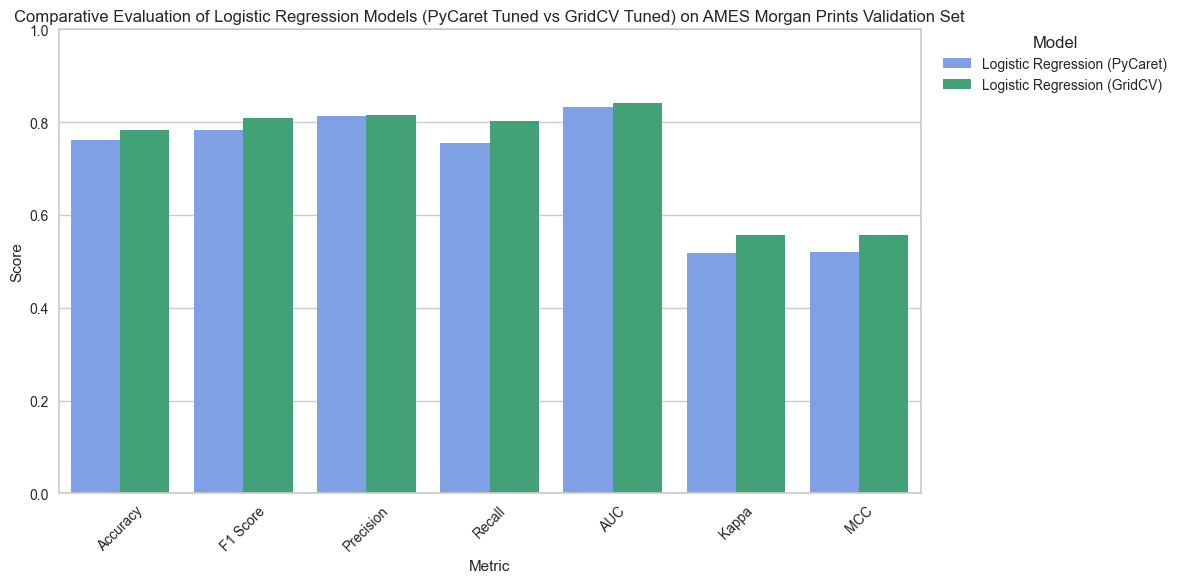

In [211]:
######################################## Compare Pycaret ET Models  vs GridCV ET Model on Validation Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_lr, bestGrid_lr], 
                                  model_names=["Logistic Regression (PyCaret)", "Logistic Regression (GridCV)"],
                                  plot_title="Comparative Evaluation of Logistic Regression Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Validation Set")

Metric  Logistic Regression (PyCaret)  Logistic Regression (GridCV)
0   Accuracy                       0.770604                      0.778159
1   F1 Score                       0.785347                      0.795957
2  Precision                       0.806069                      0.802548
3     Recall                       0.765664                      0.789474
4        AUC                       0.839944                      0.855090
5      Kappa                       0.539384                      0.552953
6        MCC                       0.540206                      0.553043

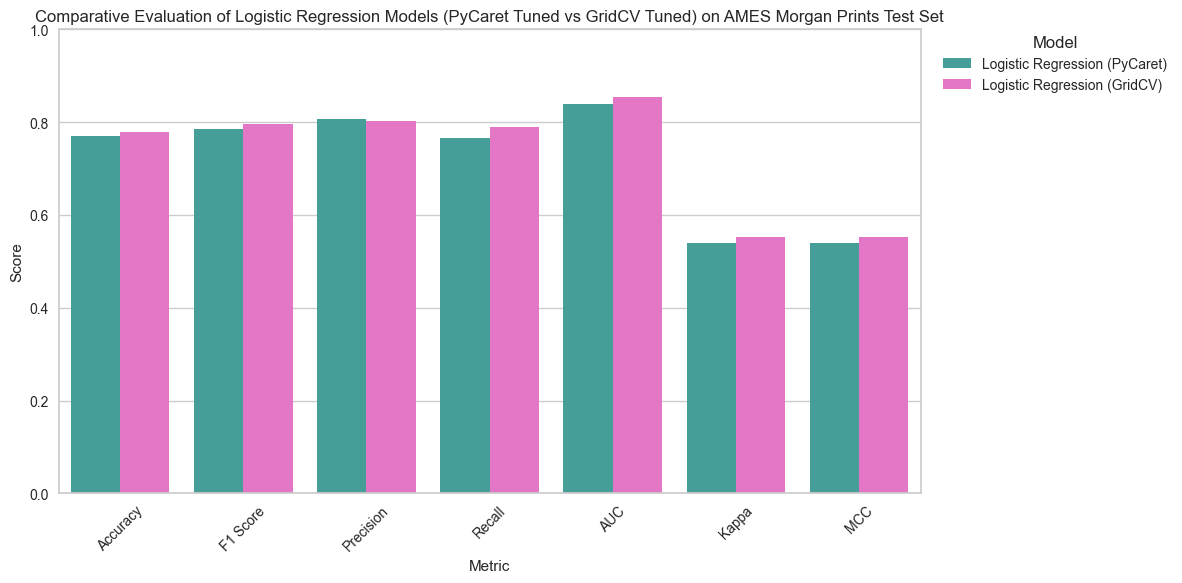

In [212]:
######################################## Compare Pycaret LR Models  vs GridCV LR Model on Test Set ########################################

trainer.compare_models_on_metrics(models=[pyC_tuned_lr, bestGrid_lr], 
                                  model_names=["Logistic Regression (PyCaret)", "Logistic Regression (GridCV)"], 
                                  dataset="test",
                                  plot_title="Comparative Evaluation of Logistic Regression Models (PyCaret Tuned vs GridCV Tuned) on AMES Morgan Prints Test Set")

______

### **5. ☑️ Select Model and Save** ###

Metric  ET Classifier  Random Forest  LightGBM  XG Boost  \
0   Accuracy       0.817308       0.810440  0.793956  0.806319   
1   F1 Score       0.839178       0.833333  0.818402  0.828676   
2  Precision       0.846341       0.839416  0.826406  0.839901   
3     Recall       0.832134       0.827338  0.810552  0.817746   
4        AUC       0.889796       0.887868  0.869069  0.880489   
5      Kappa       0.627766       0.613615  0.580358  0.606018   
6        MCC       0.627887       0.613701  0.580504  0.606305   

   Logistic Regression  
0             0.782967  
1             0.809179  
2             0.815085  
3             0.803357  
4             0.842089  
5             0.557617  
6             0.557696

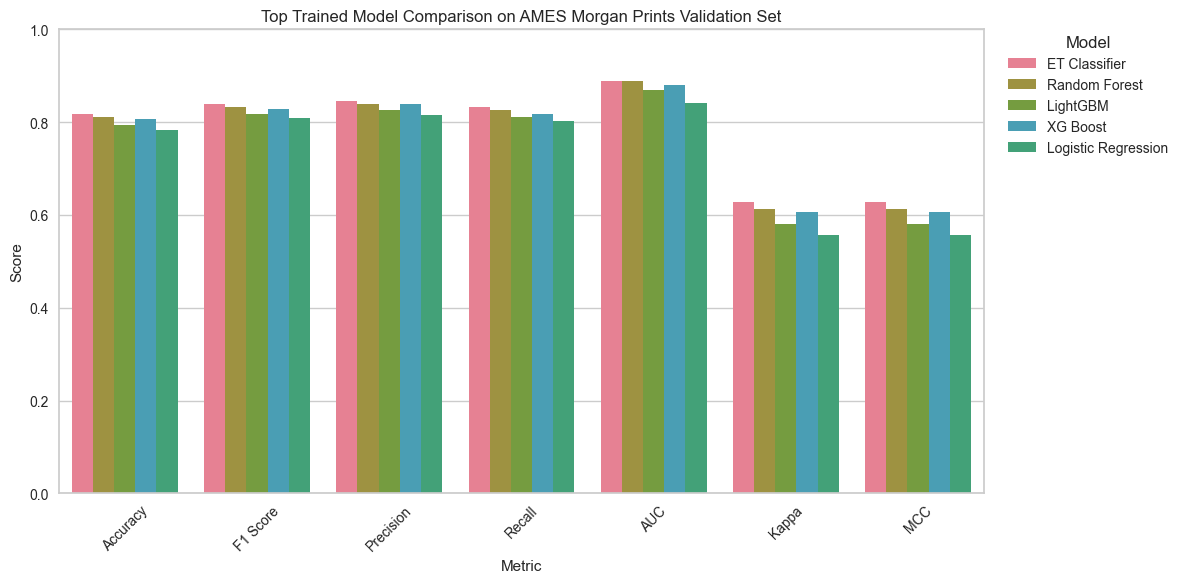

In [215]:
######################################## Compare all Models on Validation Set ########################################

trainer.compare_models_on_metrics(models=[bestGrid_et, bestGrid_rf, bestGrid_lgbm, bestGrid_xgb, bestGrid_lr], 
                                  model_names=["ET Classifier", "Random Forest", "LightGBM", "XG Boost", "Logistic Regression"],
                                  plot_title="Top Trained Model Comparison on AMES Morgan Prints Validation Set")

Metric  ET Classifier  Random Forest  LightGBM  XG Boost  \
0   Accuracy       0.831731       0.824863  0.809066  0.824176   
1   F1 Score       0.845815       0.840525  0.825377  0.837769   
2  Precision       0.849558       0.838951  0.827456  0.847436   
3     Recall       0.842105       0.842105  0.823308  0.828321   
4        AUC       0.896976       0.892930  0.886614  0.895506   
5      Kappa       0.660638       0.646315  0.614774  0.645920   
6        MCC       0.660669       0.646321  0.614783  0.646120   

   Logistic Regression  
0             0.778159  
1             0.795957  
2             0.802548  
3             0.789474  
4             0.855090  
5             0.552953  
6             0.553043

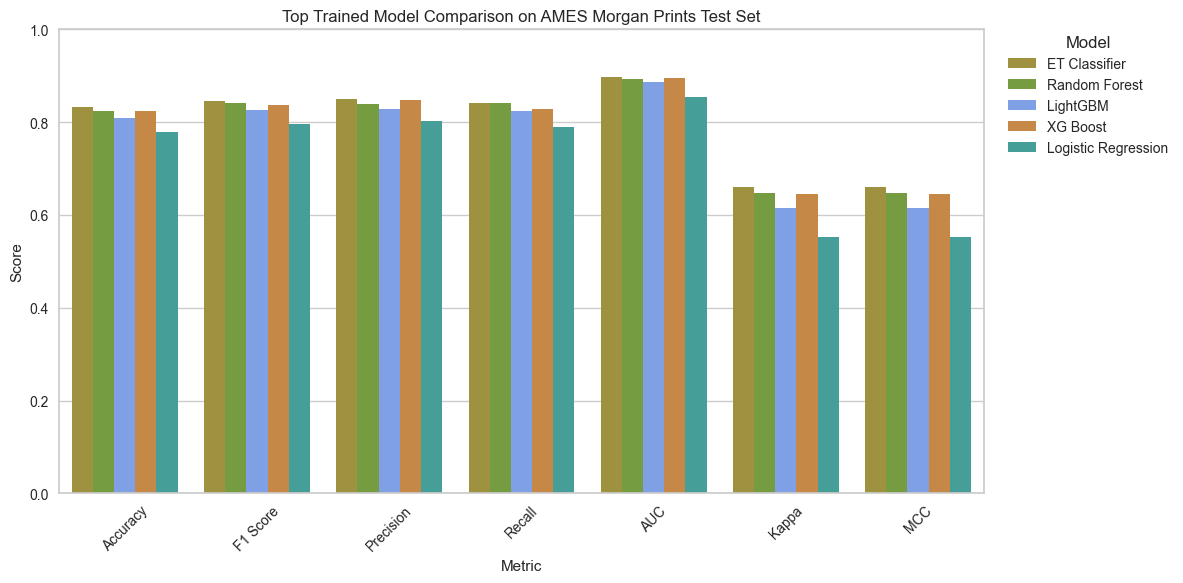

In [216]:
######################################## Compare all Models on Test Set ########################################

trainer.compare_models_on_metrics(models=[bestGrid_et, bestGrid_rf, bestGrid_lgbm, bestGrid_xgb, bestGrid_lr],
                                  model_names=["ET Classifier", "Random Forest", "LightGBM", "XG Boost", "Logistic Regression"],
                                  dataset="test",
                                  plot_title="Top Trained Model Comparison on AMES Morgan Prints Test Set")

In [217]:
######################################## Save Top Model(s)  ########################################
trainer.save_model(model = bestGrid_et, dataset_name=dataset, featurizer_id=model_id)
trainer.save_model(model = bestGrid_rf, dataset_name=dataset, featurizer_id=model_id)
trainer.save_model(model = bestGrid_lgbm, dataset_name=dataset, featurizer_id=model_id)
trainer.save_model(model = bestGrid_xgb, dataset_name=dataset, featurizer_id=model_id)
trainer.save_model(model = bestGrid_lr, dataset_name=dataset, featurizer_id=model_id)

💾 Model saved to: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/models/ames/ames_eos4wt0_extratreesclassifier.pkl
💾 Model saved to: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/models/ames/ames_eos4wt0_randomforestclassifier.pkl
💾 Model saved to: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/models/ames/ames_eos4wt0_lgbmclassifier.pkl
💾 Model saved to: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/models/ames/ames_eos4wt0_xgbclassifier.pkl
💾 Model saved to: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/models/ames/ames_eos4wt0_logisticregression.pkl


## ⚖️ Compare Models across Featurizers ##

**e.g Top Performing models trained across both ErG-2D(eos5guo) and Morgan Prints(eos4wt0) Model**

In [218]:
######################################## Redefine dataset ########################################
dataset = 'AMES'

In [219]:
######################################## Instantiate a dummy trainer (only need for the method access) ########################################
trainer = ModelTrainer(X_train=None, y_train=None, X_valid=None, y_valid=None, X_test=None, y_test=None)

In [223]:
######################################## Define all models using their file paths and featurizer IDs ########################################
model_infos = [
    {
        "path": "../models/ames/ames_eos4wt0_extratreesclassifier.pkl",
        "dataset": "AMES",
        "model_id": "eos4wt0", # Morgan Prints
        "label": "ExtraTrees (Morgan Prints)"
    },
    {
        "path": "../models/ames/ames_eos4wt0_lgbmclassifier.pkl",
        "dataset": "AMES",
        "model_id": "eos4wt0", # Morgan Prints
        "label": "LightGBM (Morgan Prints)"
    },
    {
        "path": "../models/ames/ames_eos4wt0_randomforestclassifier.pkl",
        "dataset": "AMES",
        "model_id": "eos4wt0", # Morgan Prints
        "label": "Random Forest (Morgan Prints)"
    },
    {
        "path": "../models/ames/ames_eos4wt0_xgbclassifier.pkl",
        "dataset": "AMES",
        "model_id": "eos4wt0", # Morgan Prints
        "label": "XGBoost (Morgan Prints)"
    },
    {
        "path": "../models/ames/ames_eos4wt0_logisticregression.pkl",
        "dataset": "AMES",
        "model_id": "eos4wt0", # Morgan Prints
        "label": "Logistic Regression (Morgan Prints)"
    },
    {
        "path": "../models/ames/ames_eos5guo_lgbmclassifier.pkl",
        "dataset": "AMES",
        "model_id": "eos5guo", # ErG - 2D featurizer
        "label": "LightGBM (ErG2D)"
    },
    {
        "path": "../models/ames/ames_eos5guo_randomforestclassifier.pkl",
        "dataset": "AMES",
        "model_id": "eos5guo", # ErG - 2D featurizer
        "label": "Random Forest (ErG2D)"
    }
]

In [224]:
######################################## Load each model + validation/test split automatically ########################################
loaded_models = [trainer.load_model_from_file(info, split="valid") for info in model_infos]

📄 Using valid data from: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid_eos4wt0_features.csv
📦 Loaded model from: ../models/ames/ames_eos4wt0_extratreesclassifier.pkl
📄 Using valid data from: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid_eos4wt0_features.csv
📦 Loaded model from: ../models/ames/ames_eos4wt0_lgbmclassifier.pkl
📄 Using valid data from: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid_eos4wt0_features.csv
📦 Loaded model from: ../models/ames/ames_eos4wt0_randomforestclassifier.pkl
📄 Using valid data from: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid_eos4wt0_features.csv
📦 Loaded model from: ../models/ames/ames_eos4wt0_xgbclassifier.pkl
📄 Using valid data from: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid_eos4wt0_features.csv
📦 Loaded model from: ../models

2025-04-06 21:06:06,733 - INFO - 🚦 Auto-featurise mode is ON
2025-04-06 21:06:06,736 - INFO - 📂 Checking for featurized files in: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits
2025-04-06 21:06:06,736 - INFO - ✅ All featurized files found. Skipping featurisation.
2025-04-06 21:06:06,737 - INFO - 📄 Loading featurized split: train_eos4wt0_features.csv
2025-04-06 21:06:07,113 - INFO - 📄 Loading featurized split: valid_eos4wt0_features.csv
2025-04-06 21:06:07,179 - INFO - 📄 Loading featurized split: test_eos4wt0_features.csv
2025-04-06 21:06:07,310 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_train because: (dtype=object)
2025-04-06 21:06:07,318 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_valid because: (dtype=object)
2025-04-06 21:06:07,320 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_test because: (dtype=object)
2025-04-06 21:06:07,323 - INFO - ✅ Preprocessing Complete

2025-04-06 21:06:07,324 - INFO - 📊 Dataset Summary:
2

Metric  ExtraTrees (Morgan Prints)  LightGBM (Morgan Prints)  \
0   Accuracy                    0.817308                  0.793956   
1   F1 Score                    0.839178                  0.818402   
2  Precision                    0.846341                  0.826406   
3     Recall                    0.832134                  0.810552   
4      Kappa                    0.627766                  0.580358   
5        MCC                    0.627887                  0.580504   
6        AUC                    0.889796                  0.869069   

   Random Forest (Morgan Prints)  XGBoost (Morgan Prints)  \
0                       0.810440                 0.806319   
1                       0.833333                 0.828676   
2                       0.839416                 0.839901   
3                       0.827338                 0.817746   
4                       0.613615                 0.606018   
5                       0.613701                 0.606305   
6                       0.887868                 0.880489   

   Logistic Regression (Morgan Prints)  LightGBM (ErG2D)  \
0                             0.782967          0.767857   
1                             0.809179          0.790062   
2                             0.815085          0.819588   
3                             0.803357          0.762590   
4                             0.557617          0.531214   
5                             0.557696          0.532941   
6                             0.842089          0.853586   

   Random Forest (ErG2D)  
0               0.744505  
1               0.772059  
2               0.789474  
3               0.755396  
4               0.481755  
5               0.482362  
6               0.839764

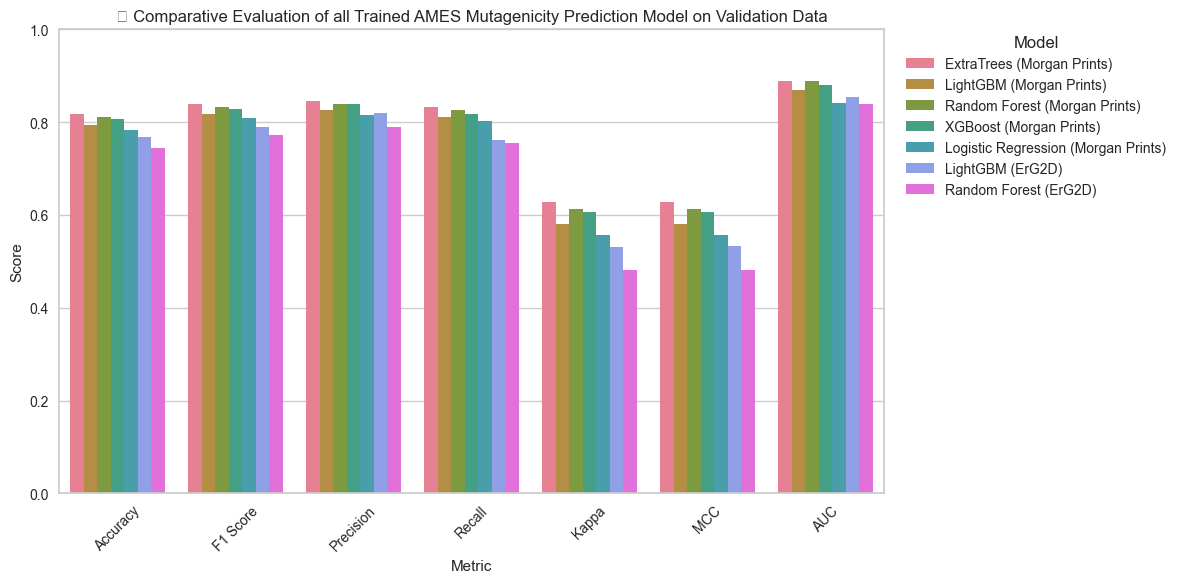

In [227]:
######################################## Run comparison betwen loaded models ########################################
trainer.compare_loaded_models_across_features(loaded_models, 
                                              eval_split="valid", 
                                              plot_title="🔬 Comparative Evaluation of all Trained AMES Mutagenicity Prediction Model on Validation Data")

2025-04-06 21:06:39,823 - INFO - 🚦 Auto-featurise mode is ON
2025-04-06 21:06:39,827 - INFO - 📂 Checking for featurized files in: /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits
2025-04-06 21:06:39,827 - INFO - ✅ All featurized files found. Skipping featurisation.
2025-04-06 21:06:39,828 - INFO - 📄 Loading featurized split: train_eos4wt0_features.csv
2025-04-06 21:06:40,262 - INFO - 📄 Loading featurized split: valid_eos4wt0_features.csv
2025-04-06 21:06:40,347 - INFO - 📄 Loading featurized split: test_eos4wt0_features.csv
2025-04-06 21:06:40,497 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_train because: (dtype=object)
2025-04-06 21:06:40,511 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_valid because: (dtype=object)
2025-04-06 21:06:40,514 - WARNING - 🧹🗑️ Dropping column 'Mol_feat_key' from X_test because: (dtype=object)
2025-04-06 21:06:40,518 - INFO - ✅ Preprocessing Complete

2025-04-06 21:06:40,518 - INFO - 📊 Dataset Summary:
2

Metric  ExtraTrees (Morgan Prints)  LightGBM (Morgan Prints)  \
0   Accuracy                    0.831731                  0.809066   
1   F1 Score                    0.845815                  0.825377   
2  Precision                    0.849558                  0.827456   
3     Recall                    0.842105                  0.823308   
4      Kappa                    0.660638                  0.614774   
5        MCC                    0.660669                  0.614783   
6        AUC                    0.896976                  0.886614   

   Random Forest (Morgan Prints)  XGBoost (Morgan Prints)  \
0                       0.824863                 0.824176   
1                       0.840525                 0.837769   
2                       0.838951                 0.847436   
3                       0.842105                 0.828321   
4                       0.646315                 0.645920   
5                       0.646321                 0.646120   
6                       0.892930                 0.895506   

   Logistic Regression (Morgan Prints)  LightGBM (ErG2D)  \
0                             0.778159          0.788462   
1                             0.795957          0.803069   
2                             0.802548          0.819843   
3                             0.789474          0.786967   
4                             0.552953          0.574789   
5                             0.553043          0.575351   
6                             0.855090          0.862633   

   Random Forest (ErG2D)  
0               0.788462  
1               0.802817  
2               0.820681  
3               0.785714  
4               0.574902  
5               0.575536  
6               0.861360

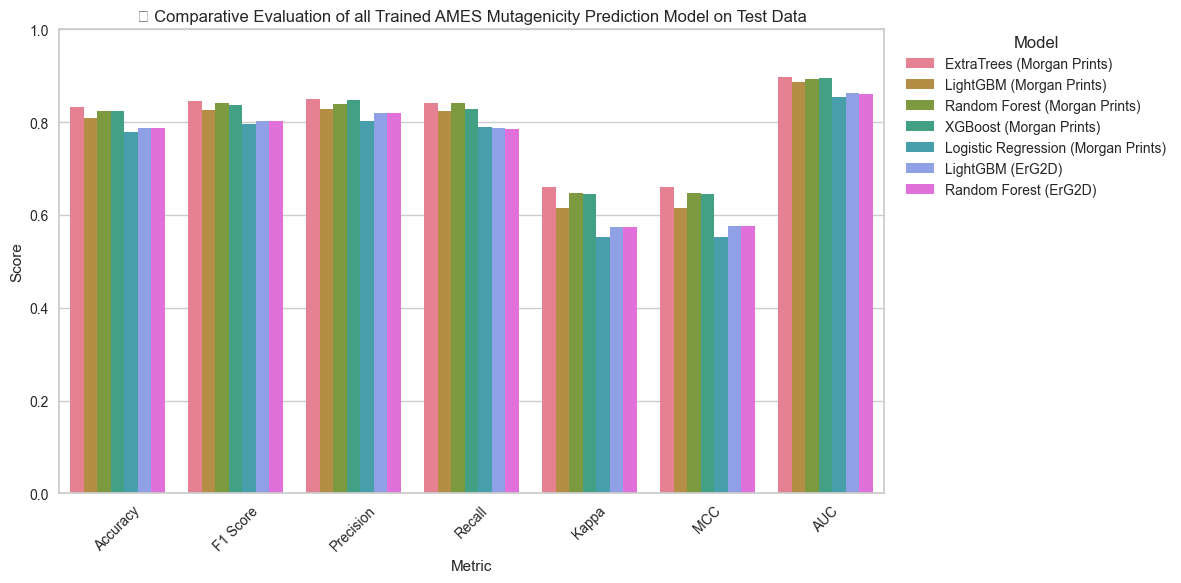

In [228]:
######################################## Run comparison betwen loaded models ########################################
trainer.compare_loaded_models_across_features(loaded_models, 
                                              eval_split="test", 
                                              plot_title="🔬 Comparative Evaluation of all Trained AMES Mutagenicity Prediction Model on Test Data")

**Based on the above Chart, it can be deduced that the Morgan Finbgerprint Featurizer is more effective for the AMES Mutagenicity Prediction, as the models trianed on the Morgan FingerPrints `eos4wt0` Featurized data all outperformed those trained on the ErG 2D Descriptors `eos5guo`.**

**🏆 And it can be confirmed that the best performing model is the `Extra Trees Classifier` prediction model trained on the Morgan FingerPrints `eos4wt0`**

_______

## 🤖 How to Use model to make Inferences ##

This section demonstrates how to load a trained model and use it to make predictions on new SMILES strings using the `ModelInference` class. It automatically detects the appropriate Ersilia featurizer based on the model filename, processes the SMILES strings, and returns a prediction along with the probability of being active (e.g., mutagenic, inhibitory, etc.).

ℹ️ NOTE: If model_path is not specified, a default model (ames_eos4wt0_extratreesclassifier.pkl) will be automatically loaded.


In [2]:
######################################## Provide the relative or absolute path to the trained model file (.pkl) ########################################
model_path = "../models/ames/ames_eos4wt0_extratreesclassifier.pkl"

In [3]:
######################################## Create an instance of ModelInference using the specified model path ########################################
inference = ModelInference(model_path)

######################################## Alternatively, use default model: ########################################
# inference = ModelInference()

2025-04-08 19:16:30,107 - INFO - [API] Initializing Ersilia model: eos4wt0
2025-04-08 19:16:53,627 - INFO - ✅ Model initialized Succesfully


✅ Model and featurizer loaded — Dataset: AMES, Featurizer: eos4wt0


In [12]:
######################################## Provide a list of SMILES strings to predict on ########################################
results = inference.predict([
    "Nc1ccc(Oc2cccc(Oc3ccc(N)cc3)c2)cc1",
    "O=C(C(=O)c1ccccc1)c1ccccc1",
    "O=C=Nc1ccc(Nc2ccc([N+](=O)[O-])cc2)cc1", # Mutagenic activity in Salmonella typhimurium TA-98 at 17 nmol/plate by Ames test in presence of rat liver microsomes S9 fraction

])
print(results)

                                   SMILES  Prediction  Mutagenic_Probability
0      Nc1ccc(Oc2cccc(Oc3ccc(N)cc3)c2)cc1           1               0.926667
1              O=C(C(=O)c1ccccc1)c1ccccc1           0               0.096667
2  O=C=Nc1ccc(Nc2ccc([N+](=O)[O-])cc2)cc1           1               0.860000


### External Evaluation on AMES Mutagenicity Dataset

In this step, the trained model is benchmarked against an external dataset sourced from literature or public benchmarks.
The file structure should contain SMILES strings under the column `"Drug"` and binary mutagenicity labels (`0` for non-mutagenic, `1` for mutagenic) under the column `"Y"`.

The `evaluate_from_csv()` method from the `ModelInference` class is used to:
- Featurize the molecules using the appropriate Ersilia model
- Run predictions on each SMILES
- Calculate key metrics (Accuracy, Precision, Recall, F1-score)
- Display a labeled confusion matrix

This helps validate the generalizability of the model on unseen chemical structures.


📊 Evaluation Metrics:
• Accuracy :  0.8317
• Precision:  0.8496
• Recall   :  0.8421
• F1 Score :  0.8458


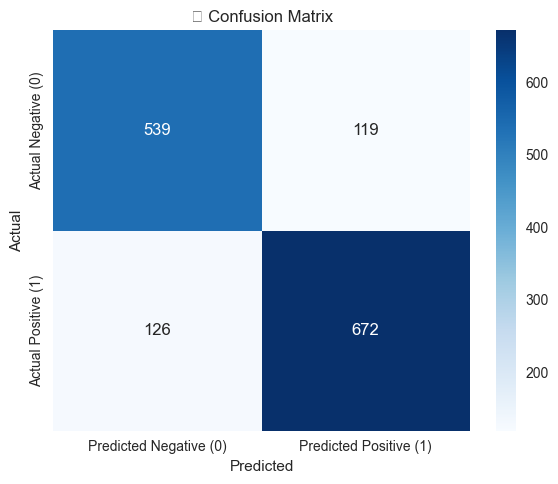

In [15]:
######################################## Provide a CSV of SMILES strings to pre on ########################################
external_data_path = "../data/AMES/ames_mutagenicity_data_external.csv"
ext_df = inference.evaluate_from_csv(external_data_path)

______